In [1]:
#-*- encoding: utf-8 -*-. -
# version : 4th com / 환경이름 es
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# x=df.index

# 우울증 관련 문항들은 질병조사
# 14년도부터 시작이지만, 16는 5문항이어서 조금 다르고
# 18, 20년이 거의 동일

In [2]:
header = pd.read_excel("농업인DB(20181222)nan.xlsx", nrows=0)
da_1 = pd.read_excel('농업인DB(20181222)nan.xlsx', skiprows = [1]) # ' ' 을 nan으로 바꿔둔 데이터셋  isna.sum 으로 걸러내기 위해

In [3]:
da_1 = da_1.iloc[:,1:]

In [4]:
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 글꼴
['sans-serif']


In [5]:
plt.rc('font', family='Malgun Gothic') 

In [6]:
da_1.head()

,시도코드,시도,시군구코드,시군구,읍면동코드,읍면동,행정리코드,행정리,조사가구번호,응답자명,...,q50.1.병의원못간이유_기타,q51.1년가구총소득,권역,st,영농형태,설계가중치,가구가중치,연령대,지역별연령대,가구원가중치
0,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,1,전은자,...,NaN,2.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
1,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,2,채전옥,...,NaN,3.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
2,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,3,김운영,...,NaN,1.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
3,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,4,김인수,...,NaN,4.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
4,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,5,홍인식,...,NaN,4.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242


In [7]:
year = 2018

# drop 할 column list 내려놓고, one hot 작업해야합니다

In [8]:
phqq_colname_list = []
for i in range(len(da_1.columns)):
    str_col = da_1.columns[i]
    if str_col.find('q48') != -1: # q48을 찾았는데 없지 않으면!
        col_index = i
        print('col index = ',i)
        print(da_1.columns[i],'\n')
        phqq_colname_list.append(str_col)
        
phqq_colname_list

col index =  272
q48.1.2주흥미재미 

col index =  273
q48.2.2주우울절망 

col index =  274
q48.3.2주수면 

col index =  275
q48.4.2주피곤기력 

col index =  276
q48.5.2주식욕저하과식 

col index =  277
q48.6.2주자괴감 

col index =  278
q48.7.2주산만함 

col index =  279
q48.8.2주느림빠름 

col index =  280
q48.9.2주자기상처생각 



['q48.1.2주흥미재미',
 'q48.2.2주우울절망',
 'q48.3.2주수면',
 'q48.4.2주피곤기력',
 'q48.5.2주식욕저하과식',
 'q48.6.2주자괴감',
 'q48.7.2주산만함',
 'q48.8.2주느림빠름',
 'q48.9.2주자기상처생각']

In [9]:
phqq_col_list = []
for i in range(len(da_1.columns)):
    str_col = da_1.columns[i]
    if str_col.find('q48') != -1: # q48을 찾았는데 없지 않으면!
        col_index = i
        print('col index = ',i)
        print(da_1.columns[i],'\n')
        phqq_col_list.append(i)
        
phqq_col_list

col index =  272
q48.1.2주흥미재미 

col index =  273
q48.2.2주우울절망 

col index =  274
q48.3.2주수면 

col index =  275
q48.4.2주피곤기력 

col index =  276
q48.5.2주식욕저하과식 

col index =  277
q48.6.2주자괴감 

col index =  278
q48.7.2주산만함 

col index =  279
q48.8.2주느림빠름 

col index =  280
q48.9.2주자기상처생각 



[272, 273, 274, 275, 276, 277, 278, 279, 280]

In [10]:
da_1.shape

(14846, 294)

In [11]:
da_1 = da_1.dropna(subset = phqq_colname_list)

In [12]:
da_1.shape

(10443, 294)

In [13]:
da_1 = da_1.reset_index(drop=True)
da_1

,시도코드,시도,시군구코드,시군구,읍면동코드,읍면동,행정리코드,행정리,조사가구번호,응답자명,...,q50.1.병의원못간이유_기타,q51.1년가구총소득,권역,st,영농형태,설계가중치,가구가중치,연령대,지역별연령대,가구원가중치
0,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,1,전은자,...,NaN,2.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
1,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,2,채전옥,...,NaN,3.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
2,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,3,김운영,...,NaN,1.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
3,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,4,김인수,...,NaN,4.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
4,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,5,홍인식,...,NaN,4.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,33,충청북도,33020,충주시,3302062,칠금동,330206203,칠금동03,7,한금자,...,NaN,8.0,충북,3,3,35.000000,66.722263,2,충북a2,134.819023
10439,33,충청북도,33020,충주시,3302062,칠금동,330206203,칠금동03,7,한금자,...,NaN,8.0,충북,3,3,35.000000,66.722263,1,충북a1,268.052955
10440,33,충청북도,33020,충주시,3302062,칠금동,330206203,칠금동03,8,송주섭,...,NaN,9.0,충북,3,3,35.000000,66.722263,4,충북a4,48.200108
10441,33,충청북도,33020,충주시,3302062,칠금동,330206203,칠금동03,9,김종천,...,NaN,8.0,충북,3,4,35.000000,56.896499,3,충북a3,67.099602


In [14]:
# , 콤마 있는 col 을 우선 목록화 하고 거기서 관찰 후 one hot 대상 필수적인것 list로 만들것

idx_col_minus = []
idx_col_comma = []
num_nan = []
idx_col_nan_many = []
ncol = len(da_1.columns)
#da_1_fillna = da_1.fillna(0)
for idx_col in range(ncol):
    flag_minus = 0
    flag_comma = 0
    
    data_observ = []
    data_observ = da_1.iloc[:,idx_col] 
    
    str_summed = "".join(list(map(str,data_observ)))    
    if '-' in str_summed: # - 표시 확인
            flag_minus= 1
    if ',' in str_summed: # , 표시 확인
            flag_comma = 1

    if flag_minus == 1: # 행방향 관찰했는데 flag가 flag_minus면
        idx_col_minus.append(idx_col)
    if flag_comma == 1: # 행방향 관찰했는데 flag가 flag_comma
        idx_col_comma.append(idx_col)
        
    if idx_col % 50 == 0:
        print('idx_col:', idx_col)

    num_nan.append(data_observ.isna().sum())
    if num_nan[idx_col] > 10000:  # phqq_colname_list에서 결측치를 제거 했기때문에 행 수가 적어져 14000에서 10000으로 변경
        idx_col_nan_many.append(idx_col)
#         if type(data_observ.fillna:
#             flag_invalid = 1
        
print('num_nan,',num_nan)

idx_col: 0
idx_col: 50
idx_col: 100
idx_col: 150
idx_col: 200
idx_col: 250
num_nan, [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 10443, 0, 0, 0, 0, 0, 5420, 5420, 0, 3299, 3300, 0, 9537, 9538, 0, 9753, 9753, 0, 10182, 10199, 10435, 10435, 10370, 10370, 10443, 10387, 10385, 0, 10424, 10424, 10424, 138, 7, 0, 13, 0, 10443, 0, 0, 0, 0, 7180, 0, 8137, 0, 8597, 2, 0, 0, 0, 3028, 10443, 7141, 7158, 5763, 5773, 9728, 9731, 10011, 10012, 10432, 10431, 10431, 3042, 3038, 3042, 3042, 3040, 3040, 3043, 34, 0, 10443, 10443, 0, 0, 0, 9963, 0, 10008, 0, 9562, 2, 2864, 10443, 0, 8988, 10443, 0, 9389, 9394, 10443, 0, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 6389, 9175, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10443, 10442, 10200, 10443, 10443, 10441, 10443, 10443, 1

In [15]:
idx_col_nan_many[:5]

[10, 28, 29, 30, 31]

In [16]:
da_1.columns[idx_col_nan_many[5]]

'q2.5.3.축산규모_닭'

In [17]:
idx_col_comma

[80, 93, 270]

In [18]:
# comma 포함된 것 중에서 관찰 확정된 것 먼저 colname

idx_colname_onehot_firm = ['q1.주요작목명', 'q17.보험가입', 'q18.1.의료기관방문이유', 'q24.1.목허리통증지속', \
                           'q27.치료수술질병선택', 'q28.의사진단질병', 'q46.4.벌레보호대착용']
idx_colname_onehot_firm

['q1.주요작목명',
 'q17.보험가입',
 'q18.1.의료기관방문이유',
 'q24.1.목허리통증지속',
 'q27.치료수술질병선택',
 'q28.의사진단질병',
 'q46.4.벌레보호대착용']

In [19]:
# droplist 기준으로 idxcol 추가 
idx_col_onehot_firm = []

for idx_col in range(ncol):
    if da_1.columns[idx_col] in idx_colname_onehot_firm:
        idx_col_onehot_firm.append(idx_col)

print('idx_col_onehot_firm,',idx_col_onehot_firm)

idx_col_onehot_firm, [13, 80, 82, 93, 103, 120, 270]


In [20]:
da_1.iloc[:, 93]

0          5,6
1          5,6
2            5
3            5
4            5
         ...  
10438      NaN
10439      NaN
10440        5
10441        5
10442    1,5,6
Name: q24.1.목허리통증지속, Length: 10443, dtype: object

In [21]:
# comma 포함된 것 중에서 관찰 확정된 것 먼저 colname

idx_colname_nohot_firm = ['q47.수면시간', 'q49.건강']
idx_colname_nohot_firm

['q47.수면시간', 'q49.건강']

In [22]:
# 확인된 nohot
idx_col_nohot_firm = []

for idx_col in range(ncol):
    if da_1.columns[idx_col] in idx_colname_nohot_firm:
        idx_col_nohot_firm.append(idx_col)

print('idx_col_nohot_firm,',idx_col_nohot_firm)

idx_col_nohot_firm, [271, 281]


In [23]:
idx_col_comma

[80, 93, 270]

In [24]:
for idx_col in idx_col_comma:
    print('idx_col_comma,',da_1.columns[idx_col]) 

idx_col_comma, q17.보험가입
idx_col_comma, q24.1.목허리통증지속
idx_col_comma, q46.4.벌레보호대착용


In [25]:
for idx_col in idx_col_minus:
    print('idx_col_minus,',da_1.columns[idx_col]) 

idx_col_minus, q2.주요작목코드


In [26]:
idx_colname_drop = [ '시도코드', '시도', '시군구', '시군구코드', '읍면동코드', '읍면동', '행정리코드', '행정리', '조사가구번호',\
                     '응답자명', '응답자연락처', '조사원성명', '조사일시', 'q1.주요작목명', 'q5.성명', '권역', '지역별연령대',\
                     '가구원번호',\
                     'q48.1.2주흥미재미', 'q48.2.2주우울절망', 'q48.3.2주수면', 'q48.4.2주피곤기력', 'q48.5.2주식욕저하과식',\
                     'q48.6.2주자괴감', 'q48.7.2주산만함', 'q48.8.2주느림빠름', 'q48.9.2주자기상처생각' ]

idx_colname_drop.append('응답자연락처')
idx_colname_drop.append('q2.주요작목코드')
idx_colname_drop.append('q27.기타 근골격계')
idx_colname_drop.append('q28.기타 근골격계')
idx_colname_drop.append('q28.의사진단질병_기타')

idx_colname_drop.append('설계가중치') # 가중치는 고민중
idx_colname_drop.append('가구가중치') # 가중치는 고민중
idx_colname_drop.append('가구원가중치') # 가중치는 고민중
# comma 기준 droplist 추가 끝

In [27]:
# droplist 기준으로 idxcol 추가 
idx_col_drop = []

for idx_col in range(ncol):
    if da_1.columns[idx_col] in idx_colname_drop:
        print(da_1.columns[idx_col])
        idx_col_drop.append(idx_col)

#print('idx_col_drop,',idx_col_drop)

시도코드
시도
시군구코드
시군구
읍면동코드
읍면동
행정리코드
행정리
조사가구번호
응답자명
응답자연락처
조사원성명
조사일시
q1.주요작목명
q2.주요작목코드
가구원번호
q5.성명
q27.기타 근골격계
q28.기타 근골격계
q28.의사진단질병_기타
q48.1.2주흥미재미
q48.2.2주우울절망
q48.3.2주수면
q48.4.2주피곤기력
q48.5.2주식욕저하과식
q48.6.2주자괴감
q48.7.2주산만함
q48.8.2주느림빠름
q48.9.2주자기상처생각
권역
설계가중치
가구가중치
지역별연령대
가구원가중치


In [28]:
# str 여부가 중요함. 그런데 위에서 nan many를 걸렀더니 전부 사라짐
#if year == 2018:
idx_col_str = []
for idx_col in range(ncol): # str이면 크기 비교로 one hot column을 결정할 수 없으므로 
    flag_str = 0
    if idx_col in idx_col_drop:
        pass
    elif idx_col in idx_col_nan_many:
        pass
    elif idx_col in idx_col_onehot_firm:
        pass
    else: # nan 많지 않고,  onehot 확정된거 아닌 중에,  str이 아니면 아래것을 관찰 가능
        data_observ = []
        data_observ = da_1.iloc[:,idx_col]

        nrow = len(data_observ)
        for idx_row in range(1, nrow):
            if type(data_observ[idx_row]) == str:
                flag_str = 1
        
        if flag_str == 1:        
            print('idx_col_str', idx_col)                
            idx_col_str.append(idx_col)

In [29]:
# one hot 필요하지 않은 숫자 컬럼 걸러내기 예를 들어 data_observ > 10
#if year == 2018:
idx_col_nohot = []
for idx_col in  range(ncol): # str이면 크기 비교로 one hot column을 결정할 수 없으므로 
    data_over10 = 0
    if idx_col in idx_col_nohot_firm:
        idx_col_nohot.append(idx_col)
        data_observ.fillna(0)
    elif idx_col in idx_col_drop:
        pass
    elif idx_col in idx_col_nan_many:
        pass
    elif idx_col in idx_col_onehot_firm:
        pass
    else: # nan 많지 않고,  onehot 확정된거 아닌 중에,  str이 아니면 아래것을 관찰 가능
        data_observ = []
        data_observ = da_1.iloc[:,idx_col]     
        data_over10 = data_observ[data_observ > 70].sum()

#     for idx_row in range(1, nrow):
#         if type(data_observ[idx_row]) == 'str':
#             print('idx_row', idx_row)
#     #print(len(data_over10))
    if data_over10 != 0:
        idx_col_nohot.append(idx_col)
        data_observ.fillna(0)
#         for idx_row in range(len(data_observ)-1):
#                da_1.iloc[idx_row,idx_col] == np.nan

#             data_observ[idx_row]
print(idx_col_nohot)

[16, 17, 19, 20, 22, 25, 49, 56, 62, 64, 66, 199, 213, 216, 271, 281]


In [30]:
idx_col_drop_nan_many = idx_col_drop + idx_col_nan_many
print('idx_col_drop_nan_many,',idx_col_drop_nan_many)

idx_col_drop_nan_many, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 43, 44, 105, 122, 136, 272, 273, 274, 275, 276, 277, 278, 279, 280, 286, 289, 290, 292, 293, 10, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 46, 61, 68, 69, 70, 71, 72, 82, 83, 89, 94, 97, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 193, 194, 195, 196, 197, 200, 201, 202, 203, 205, 206, 208, 209, 211, 212, 214, 215, 217, 218, 228, 284]



# One hot

In [31]:
# 안교수님 코드 참고
# new_header=[]
# new_values=[[] for i in range(nrow)]

# for j in range(ncol):
#     dic_key2seti={}
#     for i in range(nrow):
#         for v in values[i][j].split(','):
#             v = v.strip()
#             if v == '':
#                 continue
#             if v not in dic_key2seti:
#                 dic_key2seti[v] = set()
#             dic_key2seti[v].add(i)
    
#     for key, set_i in sorted(dic_key2seti.items(), key=lambda x:len(x[1]), reverse=True):
#         new_header.append('%s.%s'%(header[j],key))
#         for i in range(nrow):
#             if i in set_i:
#                 new_values[i].append('1')
#             else:
#                 new_values[i].append('0')    

In [32]:
da_1_col_list = da_1.columns
header_list = da_1_col_list.tolist()
#header_list = header_list[0][1:]
print('header_list',header_list[:4])

header_list ['시도코드', '시도', '시군구코드', '시군구']


In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

idx_col_cum_onehot = 0
idx_col_onehot = []

new_header = []
num_op_list = []
idx_nan = []
for idx_col in range(ncol):
    colname = []
    print(idx_col)
    if idx_col in idx_col_drop_nan_many:
        pass
    
    elif idx_col in idx_col_nohot:
        pass
    
    else: # elif idx_col in idx_col_onehot_firm: 이것은 포함되어 있을 확률이 높음
#         target_ohe = []
        data_observ = da_1.iloc[:,idx_col]
        target_ohe = da_1[[ da_1.columns[idx_col] ]]
        str_summed = "".join(list(map(str,data_observ))) 
        # idx_col_one_hot이 추가되기 전에 해당 col drop   
        idx_col_onehot.append(idx_col)
        flag_op_plus = 0
        if ',' in str_summed:
            data_maxforhot = [] # col마다 초기화 row 전체 확인
            for idx_row in range(len(data_observ)):
                if 'nan' in str(data_observ[idx_row]):
                    flag_op_plus = 1
                else:
                    data_tmp_1 = str(data_observ[idx_row]).split(sep=',')
                    data_tmp_list_int = list(map(int, data_tmp_1))
                    #print('data_tmp_1,', np.max(data_tmp_list) )
                    data_maxforhot.append(np.max(data_tmp_list_int))

            # 해당 row를 모두 돌아가며 그 최대값을 알아낸 다음
            if flag_op_plus == 1:
                num_op = np.max(data_maxforhot) + 1 # 정답 옵션 op 의 숫자 = 최대 숫자 + 1  nan 때문
            else:
                num_op = np.max(data_maxforhot) # 정답 옵션 op 의 숫자 = 최대 숫자
            
            num_op_list.append(num_op)
            #print('num_op,',num_op)
            #colname = list(map(str, range(0,num_op))) # 0부터 최대 숫자 전까지 range를  str list로 colname 지정
            
            for idx_op in range(num_op): # colname과 새로운 header를 만듦
                colname.append('%s.%s'%(header_list[idx_col],idx_op + 1 )) # op 설문지대로 +1 0->1로 기록되도록 
                new_header.append('%s.%s'%(header_list[idx_col],idx_op + 1))
            
            # 해당 row를 모두 돌아가며 그 최대값을 알아낸 다음
            for idx_row in range(len(data_observ)):
                if idx_row == 0: # 처음은 0으로 채워줍니다 
                    data_one_hot_eachp = np.zeros(num_op)
                    
                if 'nan' in str(data_observ[idx_row]):                # 빈칸도 data_one_hot 맨끝 
                    idx_nan.append(idx_row)
                    #print(da_1.columns[idx_col])
                    data_one_hot_eachp[num_op-1] = 1 # 응답의 번호 = 그 최대 옵션의 -1이 됨

                else:
                    data_tmp_1 = str(da_1.iloc[idx_row,idx_col]).split(sep=',')
                    for ans in list(map(int, data_tmp_1)): # str을 다시 int로 될까  map으로 한꺼번에 한다음, 그 결과를 리스트로
                        data_one_hot_eachp[ans-1] = 1 # 응답의 번호가 7이라면, 위치 idx는 0부터 시작하므로 6으로 저장돼야함
    #                         #print('data_one_hot_eachp:',data_one_hot_eachp)
        
                # 주의 idx_row == 0 조건은 같아도 맨 위에 zeros 깔아주는 것과 데이터 저장 다름
                if idx_row == 0:
                    tmp_one_hot = pd.DataFrame([data_one_hot_eachp], columns = colname) # [[]] df는 괄호 두개 
 #                   tmp_one_hot = pd.DataFrame([data_one_hot_eachp]) # [[]] df는 괄호 두개 
                else:
                    tmp_one_hot = pd.concat([tmp_one_hot, pd.DataFrame([data_one_hot_eachp], columns = colname)],axis=0)
#                    tmp_one_hot = pd.concat([tmp_one_hot, pd.DataFrame([data_one_hot_eachp])],axis=0)

                        # Reindexing only valid with uniquely valued Index objects
                    # eachp의 모든행을 다 연결하고 나면 df
            df_ohe_tmp = tmp_one_hot.reset_index()
            
        else:
            ohe.fit(target_ohe)
            ohe_tmp = ohe.transform(target_ohe)
            num_op = np.shape(ohe_tmp)[1]
            num_op_list.append(num_op)
            
            for idx_op in range(num_op): # colname과 새로운 header를 만듦
                colname.append('%s.%s'%(header_list[idx_col],idx_op + 1  )) 
                new_header.append('%s.%s'%(header_list[idx_col],idx_op + 1 ))
                
            df_ohe_tmp = pd.DataFrame(ohe_tmp, columns = colname)

        if idx_col_cum_onehot == 0:
            da_1_one_hot_raw = df_ohe_tmp
        else:    
            da_1_one_hot_raw = pd.concat([da_1_one_hot_raw, df_ohe_tmp], axis=1)
            
        idx_col_cum_onehot = idx_col_cum_onehot+1

            #print(data_one_hot)
#     data_one_hot_eachq = data_one_hot
#     del data_one_hot
#  = pd.concat(da_1_con_onehot, data_one_hot_eachq)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

42
43
44
45
46
47
48
49
50
51
52


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

53
54
55
56
57
58
59
60
61
62
63


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

64
65
66
67
68
69
70
71
72
73
74
75


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

76
77
78
79
80


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

81
82
83
84
85
86
87
88


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

89
90
91
92
93


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


94
95
96
97
98
99
100


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

208
209
210
211
212
213
214
215
216
217
218
219
220
221


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

222
223
224
225


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

226
227
228
229
230


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

231
232
233
234


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

235
236
237
238


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

239
240
241
242


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

243
244
245
246


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

247
248
249
250


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

251
252
253


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


254
255
256


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


257
258
259


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


260
261
262


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


263
264
265


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


266
267
268


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


269
270


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


271
272
273
274
275
276
277
278
279
280
281
282
283
284
285


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


286
287
288
289
290
291


C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aud82\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


292
293


In [34]:
na_feature = da_1_one_hot_raw.isna().sum()

idx_na_feat = na_feature[na_feature > 0]
print(idx_na_feat)

Series([], dtype: int64)


In [35]:
da_1_one_hot_raw.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [36]:
da_1_one_hot = da_1_one_hot_raw.drop(columns=['index'])

In [37]:
da_1_one_hot['q50.병의원못감.2'].sum()

9308.0

In [38]:
da_1_nohot = da_1.copy()
da_1_nohot.head()

,시도코드,시도,시군구코드,시군구,읍면동코드,읍면동,행정리코드,행정리,조사가구번호,응답자명,...,q50.1.병의원못간이유_기타,q51.1년가구총소득,권역,st,영농형태,설계가중치,가구가중치,연령대,지역별연령대,가구원가중치
0,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,1,전은자,...,NaN,2.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
1,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,2,채전옥,...,NaN,3.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
2,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,3,김운영,...,NaN,1.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
3,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,4,김인수,...,NaN,4.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242
4,32,강원도,32030,강릉시,3203061,내곡동,320306101,내곡동01,5,홍인식,...,NaN,4.0,강원,3,2,35.975758,25.005364,4,강원a4,23.382242


In [39]:
idx_col_for_nohot = idx_col_drop_nan_many + idx_col_onehot
da_1_nohot.drop(da_1.columns[idx_col_for_nohot],axis=1,inplace=True)

In [40]:
da_1_nohot_nonan = da_1_nohot.fillna(0)
da_1_nohot_nonan

,q2.1.논농사규모,q2.1논농사기간,q2.2.밭농사규모,q2.2.밭농사기간,q2.3.과수원규모,q2.4.시설규모,q9.연령,q13.농업종사기간,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강
0,0.0,0.0,1000.0,40.0,0.0,0.0,70,40.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0
1,0.0,0.0,1000.0,60.0,0.0,0.0,87,60.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2,0.0,0.0,990.0,40.0,0.0,0.0,78,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
3,0.0,0.0,2540.0,50.0,0.0,0.0,79,40.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2.0
4,0.0,0.0,1600.0,30.0,0.0,0.0,75,30.0,0.0,0.0,0.0,250.0,0.0,0.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,0.0,0.0,0.0,0.0,39669.0,0.0,54,10.0,0.0,0.0,18.0,0.0,0.0,0.0,7.0,0.0
10439,0.0,0.0,0.0,0.0,39669.0,0.0,49,10.0,0.0,0.0,18.0,0.0,0.0,0.0,7.0,2.0
10440,0.0,0.0,0.0,0.0,6611.0,0.0,70,50.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0
10441,0.0,0.0,0.0,0.0,0.0,9917.0,66,45.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0


In [41]:
df_onehot_nohot = pd.concat( [da_1_one_hot, da_1_nohot_nonan], axis = 1 )
df_onehot_nohot


,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q9.연령,q13.농업종사기간,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,70,40.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,87,60.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,78,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,79,40.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,75,30.0,0.0,0.0,0.0,250.0,0.0,0.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,54,10.0,0.0,0.0,18.0,0.0,0.0,0.0,7.0,0.0
10439,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49,10.0,0.0,0.0,18.0,0.0,0.0,0.0,7.0,2.0
10440,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,70,50.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0
10441,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,66,45.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0


# nohot 부분은 one hot 부분 drop하고 남은 것이 될테니 그때 fillna(0) 하면됨
#     if idx_col in idx_col_nohot:
#         idx_col_cum_nohot = idx_col_cum_nohot + 1

# label  설정!  phq를 활용함

In [42]:
phq_base = da_1.iloc[:,phqq_col_list[0]]
#phq_base = pd.DataFrame(phq_base)

In [43]:
type(phq_base)

pandas.core.series.Series

In [44]:
for idx_col in range(len(phqq_col_list)-1):
    idx_col = idx_col + 1 # idx 1부터 원래길이 - 1
    #df_tmp = pd.DataFrame(da_1.iloc[:,phqq_col_list[idx_col]])
    data_series = da_1.iloc[:,phqq_col_list[idx_col]] - 1 # 각 항목이 1씩 더해진상태, 1번은 0점 2번은 1점
    phq_base = pd.concat([phq_base,data_series],axis=1)

In [45]:
phq_base.head()

,q48.1.2주흥미재미,q48.2.2주우울절망,q48.3.2주수면,q48.4.2주피곤기력,q48.5.2주식욕저하과식,q48.6.2주자괴감,q48.7.2주산만함,q48.8.2주느림빠름,q48.9.2주자기상처생각
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0


In [46]:
phq = phq_base.sum(axis=1)  
phq

0         1.0
1         7.0
2         3.0
3         3.0
4         5.0
         ... 
10438     1.0
10439     2.0
10440     1.0
10441    10.0
10442     4.0
Length: 10443, dtype: float64

In [47]:
max(phq)

28.0

attribute df를 만들고 나서 target열 추가

In [48]:
df = df_onehot_nohot.copy()
np.shape(df)

(10443, 748)

In [49]:
df["phq"] = phq
df.head()


,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q13.농업종사기간,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강,phq
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,60.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,7.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2.0,3.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,30.0,0.0,0.0,0.0,250.0,0.0,0.0,5.0,3.0,5.0


In [50]:
# target 27 초과는 행삭제

data_observ = []
data_observ = df['phq']
    
for idx_row in range(0,len(data_observ)): # 행인덱스 0에서 시작
    if data_observ.iloc[idx_row] > 27:
        df = df.drop(df.index[idx_row])
    elif data_observ.iloc[idx_row] < 0:
        df = df.drop(df.index[idx_row])



In [51]:
df.shape

(10439, 749)

In [52]:
sorted_phq_9 = df['phq'].copy()
sorted_phq_9 = sorted(sorted_phq_9)
sorted_phq_9[-10:]

[22.0, 23.0, 23.0, 24.0, 24.0, 25.0, 26.0, 28.0, 28.0, 28.0]

In [53]:
# labeling   1,  0 시작

In [54]:
#idx_cum = 0
idx_row_severe = []
idx_row_moderately_severe = []
idx_row_moderate = []
idx_row_mild = []
idx_row_minimal = []
for idx_row in range(len(df['phq'])):
    if df['phq'].iloc[idx_row] >= 21:
        #idx_cum = idx_cum + 1
        idx_row_severe.append(idx_row)
    elif df['phq'].iloc[idx_row] >= 15:
        idx_row_moderately_severe.append(idx_row)
    elif df['phq'].iloc[idx_row] >= 10:
        idx_row_moderate.append(idx_row)
    elif df['phq'].iloc[idx_row] >= 5:
        idx_row_mild.append(idx_row)
    else:
        idx_row_minimal.append(idx_row)

In [55]:
# 2018
print('depre_num: ',len(idx_row_severe), len(idx_row_moderately_severe), len(idx_row_moderate), len(idx_row_mild), len(idx_row_minimal))
print('depre_totalnum: ', len(idx_row_severe)+len(idx_row_moderately_severe)+len(idx_row_moderate)+len(idx_row_mild)+len(idx_row_minimal)) 

depre_num:  26 67 364 1990 7992
depre_totalnum:  10439


In [56]:
#idx_row_severegroup_to2 = idx_row_severe + idx_row_moderately_severe + idx_row_moderate + idx_row_mild
idx_row_severegroup_to2 = idx_row_severe + idx_row_moderately_severe + idx_row_moderate
print(idx_row_severegroup_to2[:109])

[717, 1261, 1484, 1773, 1959, 2039, 3044, 4478, 5000, 5796, 6087, 7252, 8556, 8569, 8584, 8676, 8729, 8855, 8994, 9052, 9160, 9207, 9432, 10364, 10379, 10380, 273, 425, 426, 588, 589, 1297, 1510, 1539, 1686, 1960, 1968, 1969, 2069, 2573, 2794, 2831, 3119, 3330, 3337, 3790, 4017, 4253, 4276, 4277, 4466, 4467, 4983, 4984, 4986, 4994, 5003, 5032, 5744, 5745, 5957, 5964, 5967, 6010, 6618, 7342, 8371, 8455, 8458, 8504, 8617, 8655, 8721, 8801, 8825, 8848, 8851, 8862, 8871, 8992, 9252, 9254, 9321, 9351, 9819, 9826, 10178, 10288, 10318, 10353, 10382, 10392, 10398, 168, 335, 363, 377, 378, 394, 400, 422, 438, 441, 444, 446, 459, 474, 475, 492]


In [57]:
df_phqsevere = df.iloc[idx_row_severegroup_to2,:].copy()
df_phqsevere

,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q13.농업종사기간,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강,phq
717,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,22.0
1261,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,65.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,21.0
1484,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,45.0,0.0,20.0,0.0,2.0,6000000.0,0.0,5.0,3.0,22.0
1773,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,60.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,21.0
1959,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,50.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,4.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10392,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,59.0,0.0,20.0,0.0,0.0,0.0,0.0,7.0,2.0,10.0
10406,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,13.0
10408,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,13.0
10428,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,12.0


In [58]:
df_phqsevere['target'] = 1
df_phqsevere

,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강,phq,target
717,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,22.0,1
1261,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,21.0,1
1484,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,2.0,6000000.0,0.0,5.0,3.0,22.0,1
1773,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,21.0,1
1959,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,7.0,4.0,25.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10392,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,7.0,2.0,10.0,1
10406,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,13.0,1
10408,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,13.0,1
10428,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,12.0,1


In [59]:
# random 하게 섞어서  최소 그룹으로부터  케이스 샘플하여  balance 맞추다
idx_row_random = np.random.permutation(len(idx_row_severegroup_to2))
print(idx_row_random[:5])
#idx_row_minimal

idx_row_minimal_permuted = np.random.permutation(idx_row_minimal)
print(idx_row_minimal_permuted[:5])

idx_row_minimal_permuted_sel = idx_row_minimal_permuted[idx_row_random] # 섞여진 많은 쪽 idx의 순서를 그 범위 내의idx_row_random으로 선택함
print(idx_row_minimal_permuted_sel[:5])

[265 252 119 448 369]
[ 2746  9680  3747 10357  1820]
[8601 4088 8238 5115 2604]


In [60]:
df_phqmin = df.iloc[idx_row_minimal_permuted_sel,:].copy()
df_phqmin

,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q13.농업종사기간,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강,phq
8601,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,50.0,3.0,0.0,0.0,15.0,4500000.0,0.0,7.0,1.0,2.0
4088,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,58.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,4.0
8238,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,45.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,1.0
5115,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,50.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0
2604,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,50.0,1.0,10.0,0.0,0.0,0.0,0.0,7.0,3.0,1.0
9024,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,30.0,1.0,32.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0
162,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,26.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0
4205,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,66.0,0.0,5.0,0.0,0.0,0.0,0.0,6.0,5.0,4.0


In [61]:
df_phqmin['target'] = 0
df_phqmin

,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강,phq,target
8601,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,15.0,4500000.0,0.0,7.0,1.0,2.0,0
4088,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,4.0,0
8238,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,1.0,0
5115,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,0
2604,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,10.0,0.0,0.0,0.0,0.0,7.0,3.0,1.0,0
9024,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,32.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,0
162,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0,0
4205,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,6.0,5.0,4.0,0


In [62]:
df_all = pd.concat([df_phqsevere, df_phqmin], axis = 0)
df_all_backup = df_all.copy()
df_all

,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강,phq,target
717,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,22.0,1
1261,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,21.0,1
1484,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,2.0,6000000.0,0.0,5.0,3.0,22.0,1
1773,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,21.0,1
1959,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,7.0,4.0,25.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,10.0,0.0,0.0,0.0,0.0,7.0,3.0,1.0,0
9024,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,32.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,0
162,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0,0
4205,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,6.0,5.0,4.0,0


data_observ = []
data_observ = df_all['target']
d_target_to3 = []
for idx_row in range(len(data_observ)):
    if idx_row in idx_row_severegroup: 
        d_target_to3.append(2)
    elif idx_row in idx_row_mild: 
        d_target_to3.append(1)        
    else:
        d_target_to3.append(0)

df_all["target"] = d_target_to3
df_all['target'].head()

# Machine Learning 

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import mglearn
import numpy as np

In [64]:
d_input_nophq = df_all.drop(["phq"],axis=1)
d_input_nophq_notarget = d_input_nophq.drop(["target"],axis=1)
d_input_nophq_notarget

,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q9.연령,q13.농업종사기간,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강
717,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,63,20.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0
1261,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,85,65.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
1484,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,65,45.0,0.0,20.0,0.0,2.0,6000000.0,0.0,5.0,3.0
1773,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,83,60.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0
1959,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,88,50.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,83,60.0,3.0,0.0,0.0,30.0,3000000.0,0.0,6.0,3.0
1880,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,21,1.0,1.0,10.0,0.0,0.0,0.0,0.0,7.0,2.0
2237,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,39,10.0,0.0,100.0,0.0,0.0,0.0,0.0,6.0,3.0
7531,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,70,40.0,0.0,20.0,0.0,0.0,0.0,0.0,6.0,3.0


In [65]:
# d_input 에 얼마나 drop하고 넣을지 결정
# d_input_nophq_notarget_noregion = d_input_nophq_notarget.drop(["시도코드"],axis=1)
# d_input_nophq_notarget_noregion = d_input_nophq_notarget_noregion.drop(columns = ["시군구코드","읍면동코드","행정리코드","조사가구번호","조사일시"])
# #d_input_nophq_notarget_noregion = d_input_nophq_notarget_noregion.drop(["설계가중치"],axis=1)
# #d_input_nophq_notarget_noregion = d_input_nophq_notarget_noregion.drop(["가구가중치"],axis=1)
# #d_input_nophq_notarget_noregion = d_input_nophq_notarget_noregion.drop(["가구원가중치"],axis=1)
# d_input_nophq_notarget_noregion_noage = d_input_nophq_notarget_noregion.drop(["q9.연령"],axis=1)
# d_input_nophq_notarget_noregion_noage = d_input_nophq_notarget_noregion_noage.drop(["연령대"],axis=1)
# d_input_nophq_notarget_noregion_noage = d_input_nophq_notarget_noregion_noage.drop(["st"],axis=1)

# d_input_nophq_notarget_noregion_noage_sub = d_input_nophq_notarget_noregion_noage.iloc[:,:]


# d_input_nophq_notarget_noregion_noage_sub

In [74]:
# d_input 에 얼마나 drop하고 넣을지 결정
d_input = d_input_nophq_notarget
d_target = df_all["target"]
# x_train, x_test, y_train, y_test = train_test_split(d_input, d_target, random_state=None)

# forest = RandomForestClassifier(n_estimators=100, random_state=0)
# forest.fit(x_train,y_train)

# print("훈련 세트 정확도 : {:.3f}".format(forest.score(x_train,y_train)))
# print("테스트 세트 정확도 : {:.3f}".format(forest.score(x_test,y_test)))
# print("특성 중요도 : \n{}".format(forest.feature_importances_[:3]))

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [76]:
x_train, x_test, y_train, y_test = train_test_split(d_input, d_target, random_state=None)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train,y_train)

features = d_input
x, y = (list(x) for x in zip(*sorted(zip(forest.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2100,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [136]:
feature_names = d_input.columns

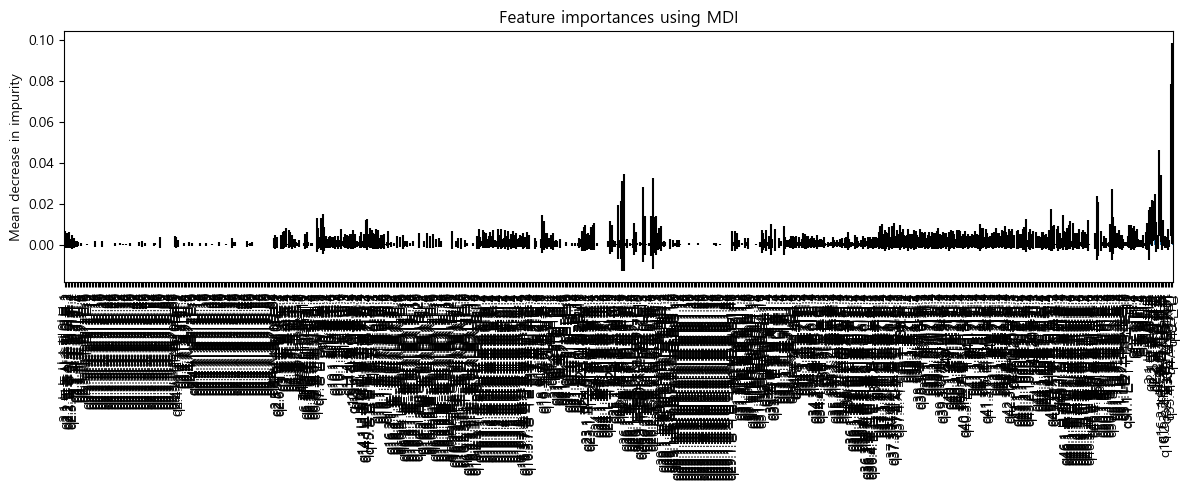

In [137]:
# sckit learn에 기본 제공되는 것
feature_names = d_input.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(12,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [138]:
importance_descending = sorted(zip(forest.feature_importances_, features),reverse = True)
importance_descending[:20]

[(0.04949771063158424, 'q49.건강'),
 (0.04130481050165095, 'q47.수면시간'),
 (0.025069491474163964, 'q9.연령'),
 (0.01757688151663134, 'q13.농업종사기간'),
 (0.013264865489622087, 'q2.2.밭농사기간'),
 (0.011545085453497856, 'q2.2.밭농사규모'),
 (0.010933717372408464, 'q26.두통어지러움.2'),
 (0.010583242619600195, 'q2.1논농사기간'),
 (0.010442175810665229, 'q26.2.두통어지러움이유.7'),
 (0.009950891399345595, 'q26.1.두통어지러움기간.13'),
 (0.009708725526356703, 'q50.1.병의원못간이유.8'),
 (0.0092970710325393, 'q2.1.논농사규모'),
 (0.008941742573256743, 'q26.두통어지러움.1'),
 (0.00803182746804404, 'q50.병의원못감.1'),
 (0.007677718388246846, 'q50.병의원못감.2'),
 (0.007218244928706627, 'q45.근처무료치료실.1'),
 (0.007014124592391461, 'q25.1.청력감소원인.6'),
 (0.006287384013834616, 'q25.1.청력감소원인.4'),
 (0.006078771186922432, 'q45.1.치료실이용.5'),
 (0.0055977421122589445, 'q16.2.2.밭_농약사용횟수')]

In [139]:
#특성중요도 top20 nan개수 데이터프레임화
num_lst=str([i for i in range(0,10)])
top_nan_drop=[]
for i in importance_descending[:60]:
    if i[1][-2] in num_lst:
         top_nan_drop.append(i[1][:-3])
    elif i[1][-1] in num_lst:
         top_nan_drop.append(i[1][:-2])
    else:
        top_nan_drop.append(i[1])
    
df_top_nan_drop=da_1[top_nan_drop].isnull().sum()
df_top_nan_drop=df_top_nan_drop.to_frame().rename(columns={0:'nan개수'})
df_top_nan_drop=df_top_nan_drop.set_axis([i[1] for i in importance_descending[:60]])
df_top_nan_drop[df_top_nan_drop['nan개수']>5000]

,nan개수
q2.1논농사기간,5420
q26.2.두통어지러움이유.7,9394
q26.1.두통어지러움기간.13,9389
q50.1.병의원못간이유.8,9322
q2.1.논농사규모,5420
q25.1.청력감소원인.6,8988
q25.1.청력감소원인.4,8988
q45.1.치료실이용.5,5114
q16.2.2.밭_농약사용횟수,5763
q43.2.1020물건횟수.2,5076


## permu  imp

from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

importances_forest_perm = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots(figsize=(12,5))
importances_forest_perm.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [70]:
# Boosting


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier


from sklearn.model_selection import cross_val_score # 이값이 높은걸 선택하면 됨
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

from statistics import mean  #평균 0 표준편차1로 맞춰줌

In [284]:
# models = { #모델이름: 모델
#     "Ran":RandomForestClassifier(n_estimators=128),
#     "KNN":KNeighborsClassifier(),
#     "Log":LogisticRegression(solver='lbfgs', max_iter=2000),
#     "GBC":GradientBoostingClassifier(),
#     "XGB":XGBClassifier(eval_metric='mlogloss', use_label_encoder =False), # 이미 deprecated 해결했지만 워닝은 나옴 !
#     #"SVC":SVC(probability=True),   #확률값으로 리턴됨
#     "SVC":SVC(gamma='scale'),   #확률값으로 리턴됨
#     "Ada":AdaBoostClassifier(),
#     "GNB":GaussianNB(),
#     "Bag":BaggingClassifier(),
#     "Cat":CatBoostClassifier()
# }

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



In [100]:
models = { #모델이름: 모델
    "LGBM":LGBMClassifier(),
    'RandomForest':RandomForestClassifier(),
    "GradientBoosting":GradientBoostingClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "XGBoost":XGBClassifier(eval_metric='mlogloss', use_label_encoder =False), # 이미 deprecated 해결했지만 워닝은 나옴 !
    "CatBoost":CatBoostClassifier()
}

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [101]:
x_test

,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q9.연령,q13.농업종사기간,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강
3643,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,72,52.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0
7640,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,67,40.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0
4892,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,75,55.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0
7719,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,77,57.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0
10337,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,51,20.0,0.0,0.0,11.0,0.0,0.0,0.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,67,6.0,0.0,10.0,0.0,0.0,0.0,0.0,8.0,3.0
5796,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,59,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0
3368,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,67,47.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0
8556,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,66,15.0,0.0,30.0,0.0,0.0,0.0,0.0,8.0,4.0


In [102]:
scores = {} # cross-validation 결과가 저장된다.
for model_name, model in models.items():
    model.fit(x_train, y_train)  #모델 학습이 일어나고 있는 중,파라미터 찾기
    acc = cross_val_score(model, x_test, y_test, scoring = "accuracy", cv = 5)  
 #정확도가 평가 요소이여서 정확도 사용 만약 다른걸 사용하고 싶다면 정확도 쓴 자리에 다른거 써줌,
 # cv=10:10번 실행하고 그 평균을 구함
    scores[model_name] = acc
 #print(f"{model_name}: {mean(acc)}")
    a=mean(acc)
 #    print("{}:{}".format(model_name,a))
 #실행시킬때마다 결과가 달라질 수 있음(데이터가 랜덤으로..)


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Learning rate set to 0.008765
0:	learn: 0.6908138	total: 7.17ms	remaining: 7.17s
1:	learn: 0.6868210	total: 14.3ms	remaining: 7.14s
2:	learn: 0.6846012	total: 21.1ms	remaining: 7.03s
3:	learn: 0.6810586	total: 26.4ms	remaining: 6.57s
4:	learn: 0.6786429	total: 31.7ms	remaining: 6.31s
5:	learn: 0.6755245	total: 37.9ms	remaining: 6.28s
6:	learn: 0.6729928	total: 43.1ms	remaining: 6.11s
7:	learn: 0.6704859	total: 48.9ms	remaining: 6.07s
8:	learn: 0.6677408	total: 54.7ms	remaining: 6.03s
9:	learn: 0.6667486	total: 57ms	remaining: 5.64s
10:	learn: 0.6639544	total: 62.5ms	remaining: 5.62s
11:	learn: 0.6622049	total: 68.2ms	remaining: 5.62s
12:	learn: 0.6595191	total: 73.7ms	remaining: 5.59s
13:	learn: 0.6568643	total: 79.1ms	remaining: 5.57s
14:	learn: 0.6542185	total: 84.7ms	remaining: 5.56s
15:	learn: 0.6522174	total: 90ms	remaining: 5.54s
16:	learn: 0.6505631	total: 95.3ms	remaining: 5.51s
17:	learn: 0.6479777	total: 101ms	remaining: 5.49s
18:	learn: 0.6455882	total: 106ms	remaining: 5.49

163:	learn: 0.4621244	total: 1.01s	remaining: 5.18s
164:	learn: 0.4614217	total: 1.02s	remaining: 5.18s
165:	learn: 0.4608378	total: 1.03s	remaining: 5.17s
166:	learn: 0.4595697	total: 1.04s	remaining: 5.18s
167:	learn: 0.4584276	total: 1.04s	remaining: 5.17s
168:	learn: 0.4577814	total: 1.05s	remaining: 5.16s
169:	learn: 0.4568256	total: 1.06s	remaining: 5.16s
170:	learn: 0.4562368	total: 1.06s	remaining: 5.15s
171:	learn: 0.4553512	total: 1.07s	remaining: 5.15s
172:	learn: 0.4550440	total: 1.07s	remaining: 5.14s
173:	learn: 0.4540004	total: 1.08s	remaining: 5.13s
174:	learn: 0.4529287	total: 1.09s	remaining: 5.12s
175:	learn: 0.4521390	total: 1.09s	remaining: 5.11s
176:	learn: 0.4512848	total: 1.1s	remaining: 5.1s
177:	learn: 0.4505496	total: 1.1s	remaining: 5.09s
178:	learn: 0.4499940	total: 1.11s	remaining: 5.08s
179:	learn: 0.4491856	total: 1.11s	remaining: 5.07s
180:	learn: 0.4485131	total: 1.12s	remaining: 5.06s
181:	learn: 0.4480044	total: 1.12s	remaining: 5.05s
182:	learn: 0.4

350:	learn: 0.3636854	total: 2.06s	remaining: 3.82s
351:	learn: 0.3632214	total: 2.07s	remaining: 3.81s
352:	learn: 0.3627850	total: 2.08s	remaining: 3.81s
353:	learn: 0.3625652	total: 2.08s	remaining: 3.8s
354:	learn: 0.3622716	total: 2.09s	remaining: 3.8s
355:	learn: 0.3618137	total: 2.1s	remaining: 3.79s
356:	learn: 0.3611991	total: 2.1s	remaining: 3.79s
357:	learn: 0.3609839	total: 2.11s	remaining: 3.78s
358:	learn: 0.3607041	total: 2.11s	remaining: 3.77s
359:	learn: 0.3601395	total: 2.12s	remaining: 3.76s
360:	learn: 0.3595573	total: 2.12s	remaining: 3.76s
361:	learn: 0.3591804	total: 2.13s	remaining: 3.75s
362:	learn: 0.3586332	total: 2.13s	remaining: 3.74s
363:	learn: 0.3580833	total: 2.14s	remaining: 3.74s
364:	learn: 0.3578221	total: 2.14s	remaining: 3.73s
365:	learn: 0.3573028	total: 2.15s	remaining: 3.72s
366:	learn: 0.3568036	total: 2.15s	remaining: 3.71s
367:	learn: 0.3564486	total: 2.16s	remaining: 3.71s
368:	learn: 0.3560966	total: 2.16s	remaining: 3.7s
369:	learn: 0.355

524:	learn: 0.3038671	total: 3.07s	remaining: 2.78s
525:	learn: 0.3036048	total: 3.08s	remaining: 2.77s
526:	learn: 0.3035092	total: 3.08s	remaining: 2.77s
527:	learn: 0.3032416	total: 3.09s	remaining: 2.76s
528:	learn: 0.3028447	total: 3.1s	remaining: 2.76s
529:	learn: 0.3024592	total: 3.1s	remaining: 2.75s
530:	learn: 0.3023538	total: 3.11s	remaining: 2.74s
531:	learn: 0.3020818	total: 3.11s	remaining: 2.74s
532:	learn: 0.3016936	total: 3.12s	remaining: 2.73s
533:	learn: 0.3011545	total: 3.12s	remaining: 2.73s
534:	learn: 0.3010234	total: 3.13s	remaining: 2.72s
535:	learn: 0.3007481	total: 3.13s	remaining: 2.71s
536:	learn: 0.3005696	total: 3.14s	remaining: 2.71s
537:	learn: 0.3003507	total: 3.15s	remaining: 2.7s
538:	learn: 0.3001878	total: 3.15s	remaining: 2.7s
539:	learn: 0.2998751	total: 3.16s	remaining: 2.69s
540:	learn: 0.2995532	total: 3.16s	remaining: 2.68s
541:	learn: 0.2992839	total: 3.17s	remaining: 2.68s
542:	learn: 0.2990056	total: 3.17s	remaining: 2.67s
543:	learn: 0.29

706:	learn: 0.2578906	total: 4.1s	remaining: 1.7s
707:	learn: 0.2576356	total: 4.1s	remaining: 1.69s
708:	learn: 0.2575205	total: 4.11s	remaining: 1.69s
709:	learn: 0.2573424	total: 4.12s	remaining: 1.68s
710:	learn: 0.2571022	total: 4.12s	remaining: 1.68s
711:	learn: 0.2567740	total: 4.13s	remaining: 1.67s
712:	learn: 0.2565137	total: 4.13s	remaining: 1.66s
713:	learn: 0.2562901	total: 4.14s	remaining: 1.66s
714:	learn: 0.2561006	total: 4.14s	remaining: 1.65s
715:	learn: 0.2559494	total: 4.15s	remaining: 1.65s
716:	learn: 0.2555549	total: 4.16s	remaining: 1.64s
717:	learn: 0.2553395	total: 4.16s	remaining: 1.63s
718:	learn: 0.2551499	total: 4.17s	remaining: 1.63s
719:	learn: 0.2548889	total: 4.17s	remaining: 1.62s
720:	learn: 0.2546595	total: 4.18s	remaining: 1.62s
721:	learn: 0.2545635	total: 4.18s	remaining: 1.61s
722:	learn: 0.2544234	total: 4.19s	remaining: 1.6s
723:	learn: 0.2542962	total: 4.19s	remaining: 1.6s
724:	learn: 0.2540855	total: 4.2s	remaining: 1.59s
725:	learn: 0.2538

883:	learn: 0.2169563	total: 5.12s	remaining: 671ms
884:	learn: 0.2168640	total: 5.12s	remaining: 666ms
885:	learn: 0.2165687	total: 5.13s	remaining: 660ms
886:	learn: 0.2163840	total: 5.14s	remaining: 654ms
887:	learn: 0.2161592	total: 5.14s	remaining: 649ms
888:	learn: 0.2158923	total: 5.15s	remaining: 643ms
889:	learn: 0.2155974	total: 5.15s	remaining: 637ms
890:	learn: 0.2154007	total: 5.16s	remaining: 631ms
891:	learn: 0.2151134	total: 5.17s	remaining: 626ms
892:	learn: 0.2147458	total: 5.17s	remaining: 620ms
893:	learn: 0.2145461	total: 5.18s	remaining: 614ms
894:	learn: 0.2144869	total: 5.18s	remaining: 608ms
895:	learn: 0.2143215	total: 5.19s	remaining: 602ms
896:	learn: 0.2140165	total: 5.2s	remaining: 597ms
897:	learn: 0.2139903	total: 5.2s	remaining: 591ms
898:	learn: 0.2137030	total: 5.21s	remaining: 585ms
899:	learn: 0.2133742	total: 5.21s	remaining: 579ms
900:	learn: 0.2133331	total: 5.22s	remaining: 573ms
901:	learn: 0.2131113	total: 5.22s	remaining: 568ms
902:	learn: 0.

46:	learn: 0.5828501	total: 260ms	remaining: 5.26s
47:	learn: 0.5811393	total: 267ms	remaining: 5.3s
48:	learn: 0.5794906	total: 274ms	remaining: 5.31s
49:	learn: 0.5770077	total: 283ms	remaining: 5.37s
50:	learn: 0.5751330	total: 290ms	remaining: 5.39s
51:	learn: 0.5729666	total: 296ms	remaining: 5.41s
52:	learn: 0.5717816	total: 299ms	remaining: 5.33s
53:	learn: 0.5695175	total: 304ms	remaining: 5.33s
54:	learn: 0.5676439	total: 309ms	remaining: 5.31s
55:	learn: 0.5664364	total: 315ms	remaining: 5.31s
56:	learn: 0.5647782	total: 321ms	remaining: 5.31s
57:	learn: 0.5623748	total: 327ms	remaining: 5.3s
58:	learn: 0.5605581	total: 333ms	remaining: 5.3s
59:	learn: 0.5593584	total: 339ms	remaining: 5.31s
60:	learn: 0.5571148	total: 344ms	remaining: 5.3s
61:	learn: 0.5560268	total: 351ms	remaining: 5.3s
62:	learn: 0.5539979	total: 357ms	remaining: 5.31s
63:	learn: 0.5518969	total: 364ms	remaining: 5.32s
64:	learn: 0.5500644	total: 371ms	remaining: 5.34s
65:	learn: 0.5480323	total: 378ms	re

241:	learn: 0.3583708	total: 1.46s	remaining: 4.58s
242:	learn: 0.3577179	total: 1.47s	remaining: 4.58s
243:	learn: 0.3569689	total: 1.47s	remaining: 4.57s
244:	learn: 0.3564042	total: 1.48s	remaining: 4.56s
245:	learn: 0.3555523	total: 1.49s	remaining: 4.56s
246:	learn: 0.3552075	total: 1.49s	remaining: 4.56s
247:	learn: 0.3541213	total: 1.5s	remaining: 4.55s
248:	learn: 0.3535333	total: 1.51s	remaining: 4.54s
249:	learn: 0.3532688	total: 1.51s	remaining: 4.53s
250:	learn: 0.3527000	total: 1.52s	remaining: 4.53s
251:	learn: 0.3520987	total: 1.52s	remaining: 4.52s
252:	learn: 0.3510806	total: 1.53s	remaining: 4.51s
253:	learn: 0.3505914	total: 1.53s	remaining: 4.5s
254:	learn: 0.3501503	total: 1.54s	remaining: 4.5s
255:	learn: 0.3491607	total: 1.54s	remaining: 4.49s
256:	learn: 0.3486100	total: 1.55s	remaining: 4.49s
257:	learn: 0.3479160	total: 1.56s	remaining: 4.48s
258:	learn: 0.3471765	total: 1.56s	remaining: 4.48s
259:	learn: 0.3463532	total: 1.57s	remaining: 4.47s
260:	learn: 0.3

415:	learn: 0.2678140	total: 2.47s	remaining: 3.46s
416:	learn: 0.2675036	total: 2.47s	remaining: 3.46s
417:	learn: 0.2670737	total: 2.48s	remaining: 3.45s
418:	learn: 0.2668179	total: 2.49s	remaining: 3.45s
419:	learn: 0.2665222	total: 2.49s	remaining: 3.44s
420:	learn: 0.2659694	total: 2.5s	remaining: 3.44s
421:	learn: 0.2655177	total: 2.5s	remaining: 3.43s
422:	learn: 0.2651845	total: 2.51s	remaining: 3.42s
423:	learn: 0.2644924	total: 2.52s	remaining: 3.42s
424:	learn: 0.2640814	total: 2.52s	remaining: 3.41s
425:	learn: 0.2635716	total: 2.53s	remaining: 3.41s
426:	learn: 0.2633520	total: 2.54s	remaining: 3.4s
427:	learn: 0.2630874	total: 2.54s	remaining: 3.4s
428:	learn: 0.2628607	total: 2.55s	remaining: 3.39s
429:	learn: 0.2624313	total: 2.55s	remaining: 3.38s
430:	learn: 0.2621270	total: 2.56s	remaining: 3.38s
431:	learn: 0.2617742	total: 2.56s	remaining: 3.37s
432:	learn: 0.2612827	total: 2.57s	remaining: 3.37s
433:	learn: 0.2610854	total: 2.58s	remaining: 3.36s
434:	learn: 0.26

577:	learn: 0.2157912	total: 3.49s	remaining: 2.55s
578:	learn: 0.2154949	total: 3.5s	remaining: 2.54s
579:	learn: 0.2152441	total: 3.51s	remaining: 2.54s
580:	learn: 0.2150596	total: 3.51s	remaining: 2.53s
581:	learn: 0.2147140	total: 3.52s	remaining: 2.53s
582:	learn: 0.2145491	total: 3.54s	remaining: 2.53s
583:	learn: 0.2143702	total: 3.54s	remaining: 2.52s
584:	learn: 0.2141907	total: 3.55s	remaining: 2.52s
585:	learn: 0.2139517	total: 3.55s	remaining: 2.51s
586:	learn: 0.2137049	total: 3.56s	remaining: 2.5s
587:	learn: 0.2134217	total: 3.56s	remaining: 2.5s
588:	learn: 0.2132261	total: 3.57s	remaining: 2.49s
589:	learn: 0.2130409	total: 3.57s	remaining: 2.48s
590:	learn: 0.2128283	total: 3.58s	remaining: 2.48s
591:	learn: 0.2124639	total: 3.58s	remaining: 2.47s
592:	learn: 0.2121148	total: 3.59s	remaining: 2.46s
593:	learn: 0.2119629	total: 3.6s	remaining: 2.46s
594:	learn: 0.2118088	total: 3.6s	remaining: 2.45s
595:	learn: 0.2114479	total: 3.61s	remaining: 2.44s
596:	learn: 0.211

741:	learn: 0.1756073	total: 4.51s	remaining: 1.57s
742:	learn: 0.1754731	total: 4.52s	remaining: 1.56s
743:	learn: 0.1753990	total: 4.52s	remaining: 1.56s
744:	learn: 0.1752840	total: 4.53s	remaining: 1.55s
745:	learn: 0.1750397	total: 4.54s	remaining: 1.54s
746:	learn: 0.1748231	total: 4.54s	remaining: 1.54s
747:	learn: 0.1746187	total: 4.55s	remaining: 1.53s
748:	learn: 0.1744959	total: 4.55s	remaining: 1.53s
749:	learn: 0.1742821	total: 4.56s	remaining: 1.52s
750:	learn: 0.1742108	total: 4.57s	remaining: 1.51s
751:	learn: 0.1739809	total: 4.57s	remaining: 1.51s
752:	learn: 0.1738932	total: 4.58s	remaining: 1.5s
753:	learn: 0.1736863	total: 4.59s	remaining: 1.5s
754:	learn: 0.1734403	total: 4.59s	remaining: 1.49s
755:	learn: 0.1733686	total: 4.6s	remaining: 1.48s
756:	learn: 0.1731757	total: 4.61s	remaining: 1.48s
757:	learn: 0.1729642	total: 4.61s	remaining: 1.47s
758:	learn: 0.1727332	total: 4.62s	remaining: 1.47s
759:	learn: 0.1725221	total: 4.62s	remaining: 1.46s
760:	learn: 0.1

905:	learn: 0.1444992	total: 5.53s	remaining: 574ms
906:	learn: 0.1443770	total: 5.54s	remaining: 568ms
907:	learn: 0.1442672	total: 5.54s	remaining: 561ms
908:	learn: 0.1440482	total: 5.55s	remaining: 555ms
909:	learn: 0.1438818	total: 5.55s	remaining: 549ms
910:	learn: 0.1436473	total: 5.56s	remaining: 543ms
911:	learn: 0.1433278	total: 5.57s	remaining: 537ms
912:	learn: 0.1431143	total: 5.57s	remaining: 531ms
913:	learn: 0.1429317	total: 5.58s	remaining: 525ms
914:	learn: 0.1427188	total: 5.58s	remaining: 519ms
915:	learn: 0.1425469	total: 5.59s	remaining: 512ms
916:	learn: 0.1424808	total: 5.59s	remaining: 506ms
917:	learn: 0.1423661	total: 5.6s	remaining: 500ms
918:	learn: 0.1421632	total: 5.6s	remaining: 494ms
919:	learn: 0.1420009	total: 5.61s	remaining: 488ms
920:	learn: 0.1419291	total: 5.62s	remaining: 482ms
921:	learn: 0.1418556	total: 5.62s	remaining: 476ms
922:	learn: 0.1416408	total: 5.63s	remaining: 469ms
923:	learn: 0.1414817	total: 5.63s	remaining: 463ms
924:	learn: 0.

67:	learn: 0.5468976	total: 407ms	remaining: 5.58s
68:	learn: 0.5452290	total: 413ms	remaining: 5.58s
69:	learn: 0.5440337	total: 419ms	remaining: 5.56s
70:	learn: 0.5426108	total: 425ms	remaining: 5.56s
71:	learn: 0.5410581	total: 431ms	remaining: 5.56s
72:	learn: 0.5397817	total: 439ms	remaining: 5.58s
73:	learn: 0.5382406	total: 445ms	remaining: 5.57s
74:	learn: 0.5367651	total: 451ms	remaining: 5.56s
75:	learn: 0.5353507	total: 458ms	remaining: 5.57s
76:	learn: 0.5338615	total: 463ms	remaining: 5.55s
77:	learn: 0.5319443	total: 470ms	remaining: 5.55s
78:	learn: 0.5303582	total: 475ms	remaining: 5.54s
79:	learn: 0.5289049	total: 481ms	remaining: 5.53s
80:	learn: 0.5276927	total: 487ms	remaining: 5.53s
81:	learn: 0.5260871	total: 493ms	remaining: 5.52s
82:	learn: 0.5249826	total: 499ms	remaining: 5.51s
83:	learn: 0.5236324	total: 505ms	remaining: 5.51s
84:	learn: 0.5221415	total: 511ms	remaining: 5.5s
85:	learn: 0.5207096	total: 517ms	remaining: 5.49s
86:	learn: 0.5191163	total: 523m

238:	learn: 0.3770530	total: 1.44s	remaining: 4.57s
239:	learn: 0.3768489	total: 1.44s	remaining: 4.57s
240:	learn: 0.3759741	total: 1.45s	remaining: 4.56s
241:	learn: 0.3752321	total: 1.46s	remaining: 4.56s
242:	learn: 0.3746096	total: 1.46s	remaining: 4.55s
243:	learn: 0.3741075	total: 1.47s	remaining: 4.55s
244:	learn: 0.3733023	total: 1.47s	remaining: 4.54s
245:	learn: 0.3723733	total: 1.48s	remaining: 4.53s
246:	learn: 0.3717312	total: 1.48s	remaining: 4.52s
247:	learn: 0.3711774	total: 1.49s	remaining: 4.52s
248:	learn: 0.3706092	total: 1.5s	remaining: 4.51s
249:	learn: 0.3699902	total: 1.5s	remaining: 4.5s
250:	learn: 0.3692852	total: 1.51s	remaining: 4.49s
251:	learn: 0.3687969	total: 1.51s	remaining: 4.49s
252:	learn: 0.3679322	total: 1.52s	remaining: 4.48s
253:	learn: 0.3671406	total: 1.52s	remaining: 4.47s
254:	learn: 0.3665104	total: 1.53s	remaining: 4.47s
255:	learn: 0.3655495	total: 1.53s	remaining: 4.46s
256:	learn: 0.3650051	total: 1.54s	remaining: 4.45s
257:	learn: 0.3

416:	learn: 0.2830734	total: 2.46s	remaining: 3.44s
417:	learn: 0.2824068	total: 2.47s	remaining: 3.44s
418:	learn: 0.2819552	total: 2.48s	remaining: 3.43s
419:	learn: 0.2816411	total: 2.48s	remaining: 3.43s
420:	learn: 0.2812878	total: 2.49s	remaining: 3.42s
421:	learn: 0.2809850	total: 2.5s	remaining: 3.42s
422:	learn: 0.2805470	total: 2.5s	remaining: 3.42s
423:	learn: 0.2802897	total: 2.51s	remaining: 3.41s
424:	learn: 0.2800261	total: 2.52s	remaining: 3.41s
425:	learn: 0.2797551	total: 2.52s	remaining: 3.4s
426:	learn: 0.2792740	total: 2.53s	remaining: 3.4s
427:	learn: 0.2789808	total: 2.54s	remaining: 3.39s
428:	learn: 0.2785032	total: 2.54s	remaining: 3.38s
429:	learn: 0.2781379	total: 2.55s	remaining: 3.38s
430:	learn: 0.2778604	total: 2.55s	remaining: 3.37s
431:	learn: 0.2774161	total: 2.56s	remaining: 3.37s
432:	learn: 0.2770288	total: 2.57s	remaining: 3.36s
433:	learn: 0.2767620	total: 2.57s	remaining: 3.35s
434:	learn: 0.2763401	total: 2.58s	remaining: 3.35s
435:	learn: 0.27

581:	learn: 0.2266398	total: 3.46s	remaining: 2.49s
582:	learn: 0.2264573	total: 3.47s	remaining: 2.48s
583:	learn: 0.2262861	total: 3.47s	remaining: 2.47s
584:	learn: 0.2259305	total: 3.48s	remaining: 2.47s
585:	learn: 0.2257292	total: 3.48s	remaining: 2.46s
586:	learn: 0.2254078	total: 3.49s	remaining: 2.46s
587:	learn: 0.2251552	total: 3.49s	remaining: 2.45s
588:	learn: 0.2248599	total: 3.5s	remaining: 2.44s
589:	learn: 0.2244078	total: 3.5s	remaining: 2.44s
590:	learn: 0.2243055	total: 3.51s	remaining: 2.43s
591:	learn: 0.2240273	total: 3.52s	remaining: 2.42s
592:	learn: 0.2235480	total: 3.52s	remaining: 2.42s
593:	learn: 0.2232425	total: 3.53s	remaining: 2.41s
594:	learn: 0.2231146	total: 3.53s	remaining: 2.4s
595:	learn: 0.2229690	total: 3.54s	remaining: 2.4s
596:	learn: 0.2226716	total: 3.54s	remaining: 2.39s
597:	learn: 0.2224355	total: 3.55s	remaining: 2.38s
598:	learn: 0.2222718	total: 3.55s	remaining: 2.38s
599:	learn: 0.2219258	total: 3.56s	remaining: 2.37s
600:	learn: 0.22

757:	learn: 0.1822090	total: 4.47s	remaining: 1.43s
758:	learn: 0.1821229	total: 4.48s	remaining: 1.42s
759:	learn: 0.1817846	total: 4.49s	remaining: 1.42s
760:	learn: 0.1816211	total: 4.5s	remaining: 1.41s
761:	learn: 0.1814330	total: 4.5s	remaining: 1.41s
762:	learn: 0.1812397	total: 4.51s	remaining: 1.4s
763:	learn: 0.1809798	total: 4.52s	remaining: 1.4s
764:	learn: 0.1807394	total: 4.52s	remaining: 1.39s
765:	learn: 0.1804913	total: 4.53s	remaining: 1.38s
766:	learn: 0.1801851	total: 4.54s	remaining: 1.38s
767:	learn: 0.1798960	total: 4.54s	remaining: 1.37s
768:	learn: 0.1797852	total: 4.55s	remaining: 1.37s
769:	learn: 0.1795609	total: 4.55s	remaining: 1.36s
770:	learn: 0.1793455	total: 4.56s	remaining: 1.35s
771:	learn: 0.1792007	total: 4.57s	remaining: 1.35s
772:	learn: 0.1790655	total: 4.57s	remaining: 1.34s
773:	learn: 0.1788322	total: 4.58s	remaining: 1.34s
774:	learn: 0.1786885	total: 4.58s	remaining: 1.33s
775:	learn: 0.1785291	total: 4.59s	remaining: 1.32s
776:	learn: 0.17

925:	learn: 0.1484262	total: 5.5s	remaining: 439ms
926:	learn: 0.1482001	total: 5.5s	remaining: 433ms
927:	learn: 0.1479412	total: 5.51s	remaining: 427ms
928:	learn: 0.1476999	total: 5.52s	remaining: 422ms
929:	learn: 0.1474473	total: 5.52s	remaining: 416ms
930:	learn: 0.1472033	total: 5.53s	remaining: 410ms
931:	learn: 0.1469788	total: 5.54s	remaining: 404ms
932:	learn: 0.1467979	total: 5.54s	remaining: 398ms
933:	learn: 0.1466089	total: 5.55s	remaining: 392ms
934:	learn: 0.1462684	total: 5.55s	remaining: 386ms
935:	learn: 0.1461521	total: 5.56s	remaining: 380ms
936:	learn: 0.1459884	total: 5.57s	remaining: 374ms
937:	learn: 0.1458377	total: 5.57s	remaining: 368ms
938:	learn: 0.1456311	total: 5.58s	remaining: 362ms
939:	learn: 0.1455215	total: 5.58s	remaining: 356ms
940:	learn: 0.1452189	total: 5.59s	remaining: 350ms
941:	learn: 0.1449737	total: 5.59s	remaining: 344ms
942:	learn: 0.1447553	total: 5.6s	remaining: 339ms
943:	learn: 0.1446134	total: 5.61s	remaining: 333ms
944:	learn: 0.1

109:	learn: 0.4920662	total: 672ms	remaining: 5.44s
110:	learn: 0.4908044	total: 679ms	remaining: 5.43s
111:	learn: 0.4898914	total: 684ms	remaining: 5.42s
112:	learn: 0.4888078	total: 690ms	remaining: 5.42s
113:	learn: 0.4873944	total: 696ms	remaining: 5.41s
114:	learn: 0.4863159	total: 703ms	remaining: 5.41s
115:	learn: 0.4851784	total: 708ms	remaining: 5.4s
116:	learn: 0.4844463	total: 714ms	remaining: 5.39s
117:	learn: 0.4832610	total: 720ms	remaining: 5.38s
118:	learn: 0.4822094	total: 725ms	remaining: 5.37s
119:	learn: 0.4809122	total: 731ms	remaining: 5.36s
120:	learn: 0.4795192	total: 737ms	remaining: 5.35s
121:	learn: 0.4782908	total: 742ms	remaining: 5.34s
122:	learn: 0.4773578	total: 748ms	remaining: 5.33s
123:	learn: 0.4765600	total: 754ms	remaining: 5.32s
124:	learn: 0.4758123	total: 759ms	remaining: 5.31s
125:	learn: 0.4747114	total: 765ms	remaining: 5.31s
126:	learn: 0.4736649	total: 771ms	remaining: 5.3s
127:	learn: 0.4727650	total: 777ms	remaining: 5.29s
128:	learn: 0.

284:	learn: 0.3546300	total: 1.69s	remaining: 4.24s
285:	learn: 0.3538735	total: 1.69s	remaining: 4.23s
286:	learn: 0.3535190	total: 1.7s	remaining: 4.22s
287:	learn: 0.3534520	total: 1.7s	remaining: 4.21s
288:	learn: 0.3527209	total: 1.71s	remaining: 4.2s
289:	learn: 0.3522094	total: 1.71s	remaining: 4.2s
290:	learn: 0.3518483	total: 1.72s	remaining: 4.19s
291:	learn: 0.3513012	total: 1.72s	remaining: 4.18s
292:	learn: 0.3505591	total: 1.73s	remaining: 4.17s
293:	learn: 0.3499673	total: 1.73s	remaining: 4.16s
294:	learn: 0.3494199	total: 1.74s	remaining: 4.16s
295:	learn: 0.3491690	total: 1.75s	remaining: 4.15s
296:	learn: 0.3488123	total: 1.75s	remaining: 4.15s
297:	learn: 0.3479318	total: 1.76s	remaining: 4.14s
298:	learn: 0.3473980	total: 1.76s	remaining: 4.13s
299:	learn: 0.3468510	total: 1.77s	remaining: 4.13s
300:	learn: 0.3463001	total: 1.77s	remaining: 4.12s
301:	learn: 0.3458521	total: 1.78s	remaining: 4.11s
302:	learn: 0.3453749	total: 1.78s	remaining: 4.11s
303:	learn: 0.34

459:	learn: 0.2761883	total: 2.72s	remaining: 3.2s
460:	learn: 0.2759060	total: 2.73s	remaining: 3.19s
461:	learn: 0.2753696	total: 2.73s	remaining: 3.19s
462:	learn: 0.2750365	total: 2.74s	remaining: 3.18s
463:	learn: 0.2748629	total: 2.75s	remaining: 3.18s
464:	learn: 0.2745481	total: 2.76s	remaining: 3.17s
465:	learn: 0.2742109	total: 2.76s	remaining: 3.17s
466:	learn: 0.2737271	total: 2.77s	remaining: 3.16s
467:	learn: 0.2733372	total: 2.77s	remaining: 3.15s
468:	learn: 0.2729863	total: 2.78s	remaining: 3.15s
469:	learn: 0.2726564	total: 2.79s	remaining: 3.14s
470:	learn: 0.2721541	total: 2.79s	remaining: 3.14s
471:	learn: 0.2718744	total: 2.8s	remaining: 3.13s
472:	learn: 0.2716244	total: 2.8s	remaining: 3.12s
473:	learn: 0.2715285	total: 2.81s	remaining: 3.12s
474:	learn: 0.2711323	total: 2.81s	remaining: 3.11s
475:	learn: 0.2705769	total: 2.82s	remaining: 3.1s
476:	learn: 0.2703455	total: 2.83s	remaining: 3.1s
477:	learn: 0.2701410	total: 2.83s	remaining: 3.09s
478:	learn: 0.269

625:	learn: 0.2219651	total: 3.75s	remaining: 2.24s
626:	learn: 0.2218635	total: 3.75s	remaining: 2.23s
627:	learn: 0.2216394	total: 3.76s	remaining: 2.23s
628:	learn: 0.2214332	total: 3.77s	remaining: 2.22s
629:	learn: 0.2211971	total: 3.78s	remaining: 2.22s
630:	learn: 0.2208183	total: 3.78s	remaining: 2.21s
631:	learn: 0.2205014	total: 3.79s	remaining: 2.21s
632:	learn: 0.2201282	total: 3.8s	remaining: 2.2s
633:	learn: 0.2198457	total: 3.81s	remaining: 2.2s
634:	learn: 0.2195538	total: 3.81s	remaining: 2.19s
635:	learn: 0.2194027	total: 3.82s	remaining: 2.19s
636:	learn: 0.2189838	total: 3.83s	remaining: 2.18s
637:	learn: 0.2186677	total: 3.83s	remaining: 2.17s
638:	learn: 0.2184209	total: 3.84s	remaining: 2.17s
639:	learn: 0.2180456	total: 3.85s	remaining: 2.16s
640:	learn: 0.2178841	total: 3.85s	remaining: 2.16s
641:	learn: 0.2175583	total: 3.86s	remaining: 2.15s
642:	learn: 0.2172901	total: 3.86s	remaining: 2.15s
643:	learn: 0.2170308	total: 3.87s	remaining: 2.14s
644:	learn: 0.2

818:	learn: 0.1764091	total: 4.98s	remaining: 1.1s
819:	learn: 0.1763380	total: 4.99s	remaining: 1.09s
820:	learn: 0.1759868	total: 5s	remaining: 1.09s
821:	learn: 0.1758764	total: 5s	remaining: 1.08s
822:	learn: 0.1756628	total: 5.01s	remaining: 1.08s
823:	learn: 0.1755174	total: 5.01s	remaining: 1.07s
824:	learn: 0.1753242	total: 5.02s	remaining: 1.06s
825:	learn: 0.1751768	total: 5.03s	remaining: 1.06s
826:	learn: 0.1750262	total: 5.03s	remaining: 1.05s
827:	learn: 0.1748068	total: 5.04s	remaining: 1.05s
828:	learn: 0.1746393	total: 5.04s	remaining: 1.04s
829:	learn: 0.1745182	total: 5.05s	remaining: 1.03s
830:	learn: 0.1743592	total: 5.05s	remaining: 1.03s
831:	learn: 0.1741476	total: 5.06s	remaining: 1.02s
832:	learn: 0.1738378	total: 5.06s	remaining: 1.01s
833:	learn: 0.1737016	total: 5.07s	remaining: 1.01s
834:	learn: 0.1734764	total: 5.07s	remaining: 1s
835:	learn: 0.1731787	total: 5.08s	remaining: 996ms
836:	learn: 0.1729523	total: 5.08s	remaining: 990ms
837:	learn: 0.1727729	

992:	learn: 0.1432343	total: 5.99s	remaining: 42.2ms
993:	learn: 0.1429164	total: 6s	remaining: 36.2ms
994:	learn: 0.1427547	total: 6s	remaining: 30.2ms
995:	learn: 0.1426609	total: 6.01s	remaining: 24.1ms
996:	learn: 0.1425656	total: 6.02s	remaining: 18.1ms
997:	learn: 0.1424442	total: 6.02s	remaining: 12.1ms
998:	learn: 0.1422162	total: 6.03s	remaining: 6.03ms
999:	learn: 0.1420556	total: 6.04s	remaining: 0us
Learning rate set to 0.004989
0:	learn: 0.6906173	total: 5.24ms	remaining: 5.24s
1:	learn: 0.6880572	total: 11.7ms	remaining: 5.84s
2:	learn: 0.6861163	total: 17.5ms	remaining: 5.81s
3:	learn: 0.6834588	total: 22.6ms	remaining: 5.64s
4:	learn: 0.6807678	total: 28.4ms	remaining: 5.65s
5:	learn: 0.6782507	total: 34ms	remaining: 5.63s
6:	learn: 0.6753053	total: 39.3ms	remaining: 5.58s
7:	learn: 0.6726675	total: 45.5ms	remaining: 5.64s
8:	learn: 0.6698134	total: 50.8ms	remaining: 5.6s
9:	learn: 0.6673426	total: 57.2ms	remaining: 5.66s
10:	learn: 0.6649107	total: 62.2ms	remaining: 5.

170:	learn: 0.4349996	total: 1.24s	remaining: 6.02s
171:	learn: 0.4341556	total: 1.25s	remaining: 6.01s
172:	learn: 0.4329344	total: 1.25s	remaining: 6s
173:	learn: 0.4321276	total: 1.26s	remaining: 5.99s
174:	learn: 0.4312533	total: 1.27s	remaining: 5.97s
175:	learn: 0.4299655	total: 1.27s	remaining: 5.96s
176:	learn: 0.4289120	total: 1.28s	remaining: 5.95s
177:	learn: 0.4282968	total: 1.29s	remaining: 5.95s
178:	learn: 0.4275326	total: 1.29s	remaining: 5.93s
179:	learn: 0.4268088	total: 1.3s	remaining: 5.92s
180:	learn: 0.4262060	total: 1.3s	remaining: 5.91s
181:	learn: 0.4251766	total: 1.31s	remaining: 5.9s
182:	learn: 0.4242711	total: 1.32s	remaining: 5.89s
183:	learn: 0.4236032	total: 1.32s	remaining: 5.87s
184:	learn: 0.4222950	total: 1.33s	remaining: 5.86s
185:	learn: 0.4220450	total: 1.33s	remaining: 5.84s
186:	learn: 0.4215357	total: 1.34s	remaining: 5.82s
187:	learn: 0.4207340	total: 1.34s	remaining: 5.81s
188:	learn: 0.4200427	total: 1.35s	remaining: 5.8s
189:	learn: 0.41937

346:	learn: 0.3274666	total: 2.48s	remaining: 4.67s
347:	learn: 0.3268722	total: 2.49s	remaining: 4.67s
348:	learn: 0.3264123	total: 2.5s	remaining: 4.66s
349:	learn: 0.3257026	total: 2.51s	remaining: 4.67s
350:	learn: 0.3253367	total: 2.52s	remaining: 4.66s
351:	learn: 0.3245633	total: 2.53s	remaining: 4.65s
352:	learn: 0.3239419	total: 2.54s	remaining: 4.65s
353:	learn: 0.3235503	total: 2.54s	remaining: 4.64s
354:	learn: 0.3232149	total: 2.55s	remaining: 4.63s
355:	learn: 0.3227696	total: 2.56s	remaining: 4.63s
356:	learn: 0.3222925	total: 2.56s	remaining: 4.62s
357:	learn: 0.3220503	total: 2.57s	remaining: 4.61s
358:	learn: 0.3215299	total: 2.58s	remaining: 4.61s
359:	learn: 0.3209957	total: 2.59s	remaining: 4.6s
360:	learn: 0.3204554	total: 2.6s	remaining: 4.6s
361:	learn: 0.3202646	total: 2.61s	remaining: 4.6s
362:	learn: 0.3199894	total: 2.62s	remaining: 4.59s
363:	learn: 0.3193449	total: 2.63s	remaining: 4.6s
364:	learn: 0.3189852	total: 2.64s	remaining: 4.6s
365:	learn: 0.31830

522:	learn: 0.2599496	total: 3.93s	remaining: 3.58s
523:	learn: 0.2597603	total: 3.94s	remaining: 3.58s
524:	learn: 0.2593126	total: 3.95s	remaining: 3.57s
525:	learn: 0.2589206	total: 3.95s	remaining: 3.56s
526:	learn: 0.2586127	total: 3.96s	remaining: 3.56s
527:	learn: 0.2583269	total: 3.97s	remaining: 3.55s
528:	learn: 0.2579098	total: 3.98s	remaining: 3.54s
529:	learn: 0.2575146	total: 3.98s	remaining: 3.53s
530:	learn: 0.2572065	total: 3.99s	remaining: 3.52s
531:	learn: 0.2569992	total: 3.99s	remaining: 3.51s
532:	learn: 0.2567971	total: 4s	remaining: 3.5s
533:	learn: 0.2564948	total: 4s	remaining: 3.5s
534:	learn: 0.2563368	total: 4.01s	remaining: 3.49s
535:	learn: 0.2561799	total: 4.02s	remaining: 3.48s
536:	learn: 0.2559160	total: 4.02s	remaining: 3.47s
537:	learn: 0.2557391	total: 4.03s	remaining: 3.46s
538:	learn: 0.2553438	total: 4.04s	remaining: 3.45s
539:	learn: 0.2551398	total: 4.04s	remaining: 3.44s
540:	learn: 0.2545882	total: 4.05s	remaining: 3.44s
541:	learn: 0.254146

685:	learn: 0.2146534	total: 4.95s	remaining: 2.27s
686:	learn: 0.2143498	total: 4.96s	remaining: 2.26s
687:	learn: 0.2139906	total: 4.97s	remaining: 2.25s
688:	learn: 0.2136324	total: 4.97s	remaining: 2.25s
689:	learn: 0.2133102	total: 4.98s	remaining: 2.24s
690:	learn: 0.2130638	total: 4.99s	remaining: 2.23s
691:	learn: 0.2128655	total: 4.99s	remaining: 2.22s
692:	learn: 0.2126323	total: 5s	remaining: 2.21s
693:	learn: 0.2123396	total: 5.01s	remaining: 2.21s
694:	learn: 0.2119924	total: 5.01s	remaining: 2.2s
695:	learn: 0.2118675	total: 5.02s	remaining: 2.19s
696:	learn: 0.2115633	total: 5.03s	remaining: 2.18s
697:	learn: 0.2112270	total: 5.03s	remaining: 2.18s
698:	learn: 0.2109975	total: 5.04s	remaining: 2.17s
699:	learn: 0.2108347	total: 5.05s	remaining: 2.16s
700:	learn: 0.2105423	total: 5.05s	remaining: 2.15s
701:	learn: 0.2101994	total: 5.06s	remaining: 2.15s
702:	learn: 0.2098987	total: 5.07s	remaining: 2.14s
703:	learn: 0.2096304	total: 5.07s	remaining: 2.13s
704:	learn: 0.20

852:	learn: 0.1752028	total: 5.99s	remaining: 1.03s
853:	learn: 0.1749678	total: 6s	remaining: 1.02s
854:	learn: 0.1748686	total: 6.01s	remaining: 1.02s
855:	learn: 0.1747499	total: 6.01s	remaining: 1.01s
856:	learn: 0.1744638	total: 6.02s	remaining: 1s
857:	learn: 0.1743582	total: 6.02s	remaining: 997ms
858:	learn: 0.1741556	total: 6.03s	remaining: 990ms
859:	learn: 0.1738688	total: 6.04s	remaining: 983ms
860:	learn: 0.1736590	total: 6.04s	remaining: 975ms
861:	learn: 0.1733479	total: 6.05s	remaining: 968ms
862:	learn: 0.1730960	total: 6.05s	remaining: 961ms
863:	learn: 0.1728721	total: 6.06s	remaining: 954ms
864:	learn: 0.1727064	total: 6.07s	remaining: 947ms
865:	learn: 0.1724576	total: 6.07s	remaining: 940ms
866:	learn: 0.1723407	total: 6.08s	remaining: 932ms
867:	learn: 0.1722049	total: 6.08s	remaining: 925ms
868:	learn: 0.1720923	total: 6.09s	remaining: 918ms
869:	learn: 0.1718618	total: 6.1s	remaining: 911ms
870:	learn: 0.1716709	total: 6.1s	remaining: 904ms
871:	learn: 0.171529

43:	learn: 0.5847591	total: 255ms	remaining: 5.55s
44:	learn: 0.5825286	total: 262ms	remaining: 5.56s
45:	learn: 0.5805114	total: 267ms	remaining: 5.54s
46:	learn: 0.5775988	total: 273ms	remaining: 5.54s
47:	learn: 0.5757489	total: 278ms	remaining: 5.52s
48:	learn: 0.5734946	total: 284ms	remaining: 5.52s
49:	learn: 0.5713295	total: 292ms	remaining: 5.54s
50:	learn: 0.5692972	total: 298ms	remaining: 5.54s
51:	learn: 0.5669475	total: 303ms	remaining: 5.53s
52:	learn: 0.5652824	total: 310ms	remaining: 5.53s
53:	learn: 0.5636291	total: 316ms	remaining: 5.53s
54:	learn: 0.5621603	total: 323ms	remaining: 5.55s
55:	learn: 0.5605737	total: 329ms	remaining: 5.54s
56:	learn: 0.5584574	total: 332ms	remaining: 5.49s
57:	learn: 0.5568255	total: 337ms	remaining: 5.47s
58:	learn: 0.5547290	total: 342ms	remaining: 5.46s
59:	learn: 0.5524888	total: 348ms	remaining: 5.45s
60:	learn: 0.5509255	total: 353ms	remaining: 5.44s
61:	learn: 0.5491860	total: 359ms	remaining: 5.43s
62:	learn: 0.5479459	total: 364

204:	learn: 0.3853144	total: 1.26s	remaining: 4.9s
205:	learn: 0.3847339	total: 1.27s	remaining: 4.9s
206:	learn: 0.3840472	total: 1.28s	remaining: 4.89s
207:	learn: 0.3834887	total: 1.28s	remaining: 4.88s
208:	learn: 0.3825480	total: 1.29s	remaining: 4.88s
209:	learn: 0.3819245	total: 1.29s	remaining: 4.87s
210:	learn: 0.3813607	total: 1.3s	remaining: 4.86s
211:	learn: 0.3800564	total: 1.31s	remaining: 4.85s
212:	learn: 0.3792379	total: 1.31s	remaining: 4.84s
213:	learn: 0.3787887	total: 1.32s	remaining: 4.83s
214:	learn: 0.3782259	total: 1.32s	remaining: 4.83s
215:	learn: 0.3774320	total: 1.33s	remaining: 4.82s
216:	learn: 0.3765639	total: 1.33s	remaining: 4.81s
217:	learn: 0.3758900	total: 1.34s	remaining: 4.81s
218:	learn: 0.3753157	total: 1.34s	remaining: 4.8s
219:	learn: 0.3743544	total: 1.35s	remaining: 4.79s
220:	learn: 0.3739493	total: 1.36s	remaining: 4.78s
221:	learn: 0.3730756	total: 1.36s	remaining: 4.78s
222:	learn: 0.3724682	total: 1.37s	remaining: 4.77s
223:	learn: 0.37

374:	learn: 0.2903500	total: 2.27s	remaining: 3.78s
375:	learn: 0.2899874	total: 2.27s	remaining: 3.77s
376:	learn: 0.2897030	total: 2.28s	remaining: 3.77s
377:	learn: 0.2894918	total: 2.29s	remaining: 3.76s
378:	learn: 0.2891236	total: 2.29s	remaining: 3.75s
379:	learn: 0.2883933	total: 2.3s	remaining: 3.75s
380:	learn: 0.2879992	total: 2.3s	remaining: 3.74s
381:	learn: 0.2874175	total: 2.31s	remaining: 3.73s
382:	learn: 0.2871548	total: 2.31s	remaining: 3.73s
383:	learn: 0.2864766	total: 2.32s	remaining: 3.72s
384:	learn: 0.2857946	total: 2.33s	remaining: 3.71s
385:	learn: 0.2853516	total: 2.33s	remaining: 3.71s
386:	learn: 0.2851305	total: 2.34s	remaining: 3.7s
387:	learn: 0.2847577	total: 2.34s	remaining: 3.69s
388:	learn: 0.2842535	total: 2.35s	remaining: 3.69s
389:	learn: 0.2837677	total: 2.35s	remaining: 3.68s
390:	learn: 0.2833587	total: 2.36s	remaining: 3.68s
391:	learn: 0.2826721	total: 2.37s	remaining: 3.67s
392:	learn: 0.2821188	total: 2.37s	remaining: 3.66s
393:	learn: 0.2

553:	learn: 0.2272787	total: 3.29s	remaining: 2.65s
554:	learn: 0.2269619	total: 3.3s	remaining: 2.65s
555:	learn: 0.2267670	total: 3.31s	remaining: 2.64s
556:	learn: 0.2264785	total: 3.31s	remaining: 2.63s
557:	learn: 0.2261855	total: 3.32s	remaining: 2.63s
558:	learn: 0.2259230	total: 3.32s	remaining: 2.62s
559:	learn: 0.2255900	total: 3.33s	remaining: 2.61s
560:	learn: 0.2253501	total: 3.33s	remaining: 2.61s
561:	learn: 0.2250835	total: 3.34s	remaining: 2.6s
562:	learn: 0.2248867	total: 3.34s	remaining: 2.6s
563:	learn: 0.2246147	total: 3.35s	remaining: 2.59s
564:	learn: 0.2243415	total: 3.35s	remaining: 2.58s
565:	learn: 0.2241172	total: 3.36s	remaining: 2.58s
566:	learn: 0.2235874	total: 3.36s	remaining: 2.57s
567:	learn: 0.2234594	total: 3.37s	remaining: 2.56s
568:	learn: 0.2232224	total: 3.38s	remaining: 2.56s
569:	learn: 0.2230015	total: 3.38s	remaining: 2.55s
570:	learn: 0.2228239	total: 3.39s	remaining: 2.54s
571:	learn: 0.2223816	total: 3.39s	remaining: 2.54s
572:	learn: 0.2

731:	learn: 0.1836451	total: 4.31s	remaining: 1.58s
732:	learn: 0.1833911	total: 4.32s	remaining: 1.57s
733:	learn: 0.1832349	total: 4.33s	remaining: 1.57s
734:	learn: 0.1831026	total: 4.33s	remaining: 1.56s
735:	learn: 0.1829987	total: 4.34s	remaining: 1.55s
736:	learn: 0.1827408	total: 4.34s	remaining: 1.55s
737:	learn: 0.1824975	total: 4.35s	remaining: 1.54s
738:	learn: 0.1823427	total: 4.36s	remaining: 1.54s
739:	learn: 0.1820394	total: 4.36s	remaining: 1.53s
740:	learn: 0.1819137	total: 4.37s	remaining: 1.53s
741:	learn: 0.1818135	total: 4.37s	remaining: 1.52s
742:	learn: 0.1815630	total: 4.38s	remaining: 1.51s
743:	learn: 0.1815277	total: 4.38s	remaining: 1.51s
744:	learn: 0.1813345	total: 4.39s	remaining: 1.5s
745:	learn: 0.1811489	total: 4.39s	remaining: 1.5s
746:	learn: 0.1810403	total: 4.4s	remaining: 1.49s
747:	learn: 0.1808757	total: 4.41s	remaining: 1.48s
748:	learn: 0.1807450	total: 4.41s	remaining: 1.48s
749:	learn: 0.1805105	total: 4.42s	remaining: 1.47s
750:	learn: 0.1

897:	learn: 0.1505408	total: 5.33s	remaining: 606ms
898:	learn: 0.1503169	total: 5.34s	remaining: 600ms
899:	learn: 0.1501560	total: 5.34s	remaining: 594ms
900:	learn: 0.1500377	total: 5.35s	remaining: 588ms
901:	learn: 0.1497358	total: 5.36s	remaining: 582ms
902:	learn: 0.1495780	total: 5.37s	remaining: 576ms
903:	learn: 0.1493429	total: 5.37s	remaining: 570ms
904:	learn: 0.1491556	total: 5.38s	remaining: 564ms
905:	learn: 0.1490508	total: 5.38s	remaining: 558ms
906:	learn: 0.1489417	total: 5.39s	remaining: 552ms
907:	learn: 0.1488309	total: 5.39s	remaining: 546ms
908:	learn: 0.1486575	total: 5.4s	remaining: 540ms
909:	learn: 0.1484431	total: 5.4s	remaining: 534ms
910:	learn: 0.1483144	total: 5.41s	remaining: 528ms
911:	learn: 0.1481641	total: 5.41s	remaining: 522ms
912:	learn: 0.1479834	total: 5.42s	remaining: 516ms
913:	learn: 0.1478235	total: 5.42s	remaining: 510ms
914:	learn: 0.1476562	total: 5.43s	remaining: 504ms
915:	learn: 0.1475551	total: 5.43s	remaining: 498ms
916:	learn: 0.

In [103]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(axis=1)
result_df = results.sort_values(by='mean', ascending=False)
result_df

,0,1,2,3,4,mean
GradientBoosting,0.760870,0.826087,0.847826,0.847826,0.800000,0.816522
CatBoost,0.782609,0.869565,0.869565,0.782609,0.755556,0.811981
XGBoost,0.804348,0.760870,0.847826,0.826087,0.777778,0.803382
LGBM,0.695652,0.891304,0.760870,0.804348,0.733333,0.777101
AdaBoost,0.739130,0.782609,0.739130,0.847826,0.688889,0.759517
RandomForest,0.652174,0.782609,0.782609,0.717391,0.711111,0.729179


corr = data_feat_label_total.corr()
plt.figure(figsize=(14, 8))
plt.title('corr', fontsize=18)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0) 
plt.show()

from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.feature_selection import f_classif      


## selctor 정의하기.
selector = SelectKBest(score_func=f_classif, k=12)
## 학습데이터에 fit_transform 
x_train_selected = selector.fit_transform(x_train, y_train)
## 테스트 데이터는 transform
x_test_selected = selector.transform(x_test)
x_train_selected.shape, x_test_selected.shape

all_names = x_train.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)


def plot_feature_importances(model):
    n_features_show = 15
    n_features = d_input.shape[1]   
    plt.figure(figsize = (10, 10))
    plt.barh(range(n_features_show), model.feature_importances_[:n_features_show], align='center')
    plt.yticks(np.arange(n_features_show), d_input[:n_features_show])
#     plt.barh(range(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), d_input)
    plt.xlabel("Importances")
    plt.ylabel("Question")
    plt.ylim(-1, n_features)

plt.show()
#plot_feature_importances(forest)

## Regressor 

x_train, x_test, y_train, y_test = train_test_split(d_input,d_target, random_state=0)

X = x_train.iloc[:,1:]
y = y_train
target = x_test.iloc[:,1:]

kf = KFold(n_splits = 50, shuffle = True, random_state = 22)

In [150]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config

In [151]:
# 원래는 3부터 마지막 전까지

d_target = df_all["phq"]
x = d_input
y = d_target
#x = scale(d_input)
#y = scale(d_target)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.10)

In [152]:
len(d_target)

914

In [154]:
set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor()
print(rfr)
 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [155]:
rfr.fit(xtrain, ytrain)

score = rfr.score(xtrain, ytrain)
print("R-squared:", score)

R-squared: 0.9104838443377777


In [156]:
ypred = rfr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
#print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

RMSE:  9.635677173913042


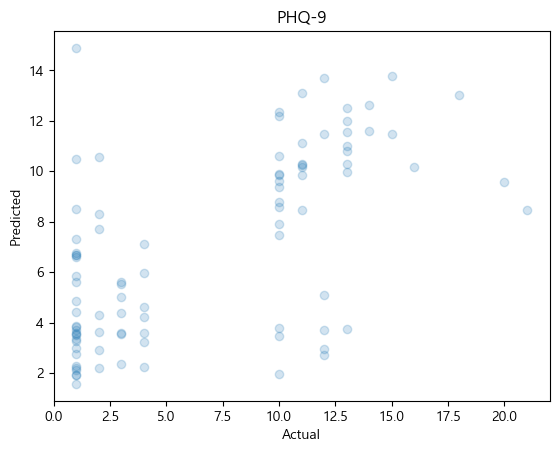

In [157]:
plt.scatter(ytest, ypred, alpha = 0.2)
plt.rcParams.update({'figure.figsize':(15,15), 'figure.dpi':100})
plt.title('PHQ-9')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

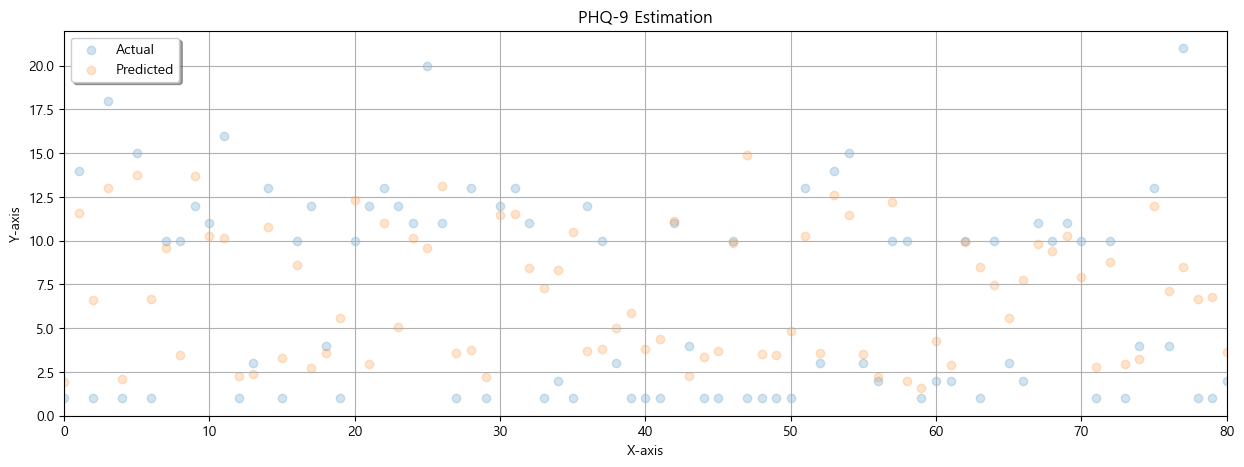

In [158]:
plt.subplots(figsize = [15,5])
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, linewidth=1, label="Actual",alpha=0.2)
plt.scatter(x_ax, ypred, linewidth=1.1, label="Predicted",alpha=0.2)
plt.title("PHQ-9 Estimation")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.xlim(0, 80)
plt.show() 


set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor()
print(rfr)
 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

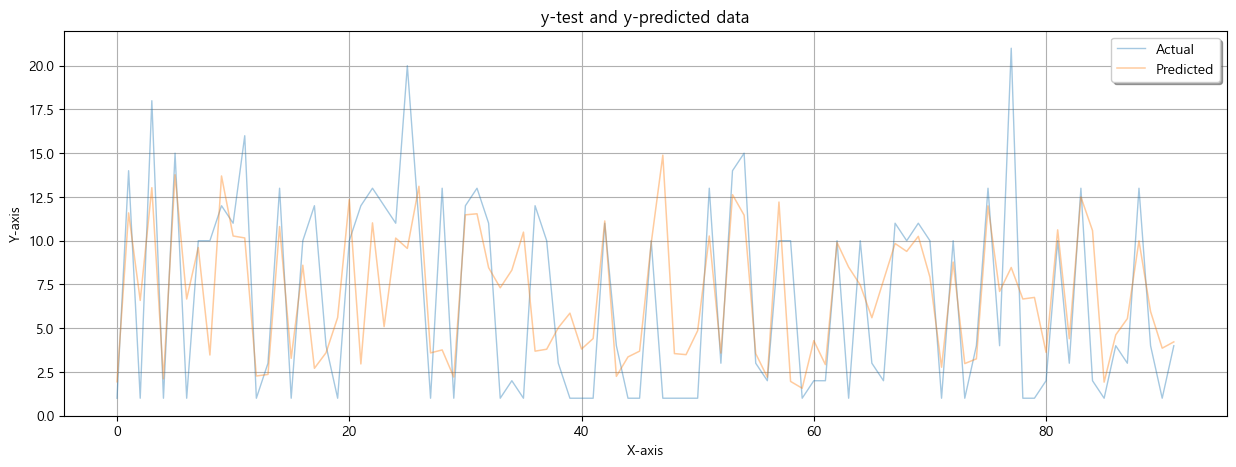

In [159]:
plt.subplots(figsize = [15,5])
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="Actual",alpha=0.4)
plt.plot(x_ax, ypred, linewidth=1.1, label="Predicted",alpha=0.4)
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [160]:
fail = 0
for i in range(len(ypred)):
    if abs(ypred[i] - ytest.iloc[i]) > 5: fail += 1

print('\n오차 5 이내일 확률 : {:.6f}%'.format((len(ypred) - fail) / len(ypred) * 100))


오차 5 이내일 확률 : 76.086957%


In [161]:
from sklearn.model_selection import KFold

In [162]:
from sklearn.model_selection import cross_validate

In [163]:
x = d_input_nophq_notarget
y = df_all['phq']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

X = x_train.iloc[:,1:]
y = y_train
target = x_test.iloc[:,1:]

kf = KFold(n_splits = 50, shuffle = True, random_state = 22)

In [164]:
from tqdm import tqdm

rf = RandomForestRegressor(random_state = 518)

rmse_list = []
rf_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in tqdm(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = [0 if x < 0 else x for x in rf.predict(val_x)]
    pred = np.array(pred)
    sub_pred = [0 if x < 0 else x for x in rf.predict(target)]
    sub_pred = np.array(sub_pred)
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 50)
np.mean(rmse_list)

from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state = 22)

rmse_list = []
gb_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) : 
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y) 
   
    pred = [0 if x < 0 else x for x in gbm.predict(val_x)]
    pred = np.array(pred)
    sub_pred = [0 if x < 0 else x for x in gbm.predict(target)]
    sub_pred = np.array(sub_pred)
    rmse = np.sqrt(mean_squared_error(val_y, pred))  
    
    rmse_list.append(rmse)
    
    gb_pred += (sub_pred / 50)
np.mean(rmse_list)

In [165]:
# 아래 regressor는 마크다운 해둠

xgb = XGBRegressor(random_state = 518)

rmse_list = []
xgb_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = [0 if x < 0 else x for x in xgb.predict(val_x)]
    pred = np.array(pred)
    sub_pred = [0 if x < 0 else x for x in xgb.predict(target)]
    sub_pred = np.array(sub_pred)
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 50)
np.mean(rmse_list)

ngb = NGBRegressor(random_state = 518)

rmse_list = []
ngb_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in tqdm(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    ngb.fit(tr_x, tr_y)
    
    pred = [0 if x < 0 else x for x in ngb.predict(val_x)]
    pred = np.array(pred)
    sub_pred = [0 if x < 0 else x for x in ngb.predict(target)]
    sub_pred = np.array(sub_pred)
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    ngb_pred += (sub_pred / 50)
np.mean(rmse_list)

from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state = 518, silent = True)

rmse_list = []
cat_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cat.fit(tr_x, tr_y)
    
    pred = [0 if x < 0 else x for x in cat.predict(val_x)]
    pred = np.array(pred)
    sub_pred = [0 if x < 0 else x for x in cat.predict(target)]
    sub_pred = np.array(sub_pred)
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 50)
np.mean(rmse_list)

print(cat.get_all_params())
print(cat.get_params())

sns.countplot(x=da1_sleep.index, data=da1_sleep)

for i in range(len(da_1.columns)):
    if da_1_col_list[i] == 'q48.2.2주우울절망':
        col_index = i
        print('col index = ',i)
        print(da_1_col_list[i],'\n')
        da_tmp = da_1.iloc[:,i]
        da_tmp[da_tmp> 23] = 1 # check range
        
da_1.iloc[:,col_index]=da_tmp
sns.countplot(x=da_1.iloc[:,col_index].index, data=da_1.iloc[:,col_index])

for i in range(len(da_1.columns)):
    if da_1_col_list[i] == 'q48.2.2주우울절망':
        col_index = i
        print('col index = ',i)
        print(da_1_col_list[i],'\n')
        da_tmp = da_1.iloc[:,i]
        da_tmp[da_tmp > 23] = 1 # check range
        da_over1 = da_tmp[da_tmp > 1]
        print('gloomy = 2 ', len(da_tmp[da_tmp == 2 ]))
        print('gloomy = 3 ', len(da_tmp[da_tmp == 3]))
        print('gloomy = 4 ', len(da_tmp[da_tmp == 4]))
        
da_1.iloc[:,col_index]=da_tmp
#sns.countplot(x=da_1.iloc[:,col_index].index, data=da_1.iloc[:,col_index])

sns.countplot(x=da_over1.index, data=da_over1)

for i in range(len(da_1_col_list)):
    if da_1_col_list[i] == 'q49.건강':
        col_index = i
        print('col index = ',i)
        print(da_1_col_list[i],'\n')
        
da_1.iloc[:,col_index]

# 최적화

In [67]:
d_input = d_input_nophq_notarget
d_target = df_all["target"]
x_train, x_test, y_train, y_test = train_test_split(d_input, d_target, random_state=None)

In [106]:
import pickle

# with open('x_train.pickle', 'wb') as f:
#     pickle.dump(x_train, f)

# with open('x_test.pickle', 'wb') as f:
#     pickle.dump(x_test, f)

# with open('y_train.pickle', 'wb') as f:
#     pickle.dump(y_train, f)

# with open('y_test.pickle', 'wb') as f:
#     pickle.dump(y_test, f)

In [63]:
with open('x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open('x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
    
with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [64]:
with open('df_optimization.pickle', 'rb') as f:
    df_optimization = pickle.load(f)

with open('result_df.pickle', 'rb') as f:
    result_df = pickle.load(f)
    
with open('xgb_y_pred.pickle', 'rb') as f:
    xgb_y_pred = pickle.load(f)
    
with open('xgb_fi.pickle', 'rb') as f:
    xgb_fi = pickle.load(f)

## LGBMClassifier

In [68]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate
from bayes_opt.util import UtilityFunction

In [69]:
def evaluate_model(num_leaves, max_depth, learning_rate, n_estimators, subsample, colsample_bytree):
    model = LGBMClassifier(num_leaves=int(num_leaves),
                           max_depth=int(max_depth),
                           learning_rate=learning_rate,
                           n_estimators=int(n_estimators),
                           subsample=subsample,
                           colsample_bytree=colsample_bytree)
    score = cross_val_score(model, x_test,y_test, cv=5, scoring='accuracy').mean()
    return score

In [70]:
pbounds = {'num_leaves': (2, 50),
           'max_depth': (2, 20),
           'learning_rate': (0.01, 0.5),
           'n_estimators': (50, 500),
           'subsample': (0.5, 1),
           'colsample_bytree': (0.5, 1)}
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=0)
optimizer.maximize(init_points=5, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.7466    | 0.7744    | 0.3604    | 12.85     | 295.2     | 22.34     | 0.8229    |
| 2         | 0.7641    | 0.7188    | 0.447     | 19.35     | 222.5     | 40.0      | 0.7644    |
| 3         | 0.7597    | 0.784     | 0.4635    | 3.279     | 89.21     | 2.97      | 0.9163    |
| 4         | 0.7596    | 0.8891    | 0.4363    | 19.62     | 409.6     | 24.15     | 0.8903    |
| 5         | 0.7857    | 0.5591    | 0.3236    | 4.58      | 475.1     | 27.05     | 0.7073    |
| 6         | 0.7553    | 0.8336    | 0.4937    | 5.92      | 476.8     | 25.18     | 0.5407    |
| 7         | 0.7727    | 0.6278    | 0.2701    | 4.404     | 491.9     | 42.28     | 0.6572    |
| 8         | 0.7989    | 0.8029    | 0.01632   | 13.08     | 235.8     | 49.6      | 0.7121    |
| 9         | 0.7901

In [71]:
lgbm_best_params = optimizer.max['params']
lgbm = LGBMClassifier(num_leaves=int(lgbm_best_params['num_leaves']),
                       max_depth=int(lgbm_best_params['max_depth']),
                       learning_rate=lgbm_best_params['learning_rate'],
                       n_estimators=int(lgbm_best_params['n_estimators']),
                       subsample=lgbm_best_params['subsample'],
                       colsample_bytree=lgbm_best_params['colsample_bytree'])

lgbm.fit(x_test, y_test)
lgbm_fi = lgbm.feature_importances_
lgbm_y_pred = lgbm.predict(x_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_y_pred)
lgbm_accuracy

0.8122270742358079

In [72]:
lgbm_best_params

{'colsample_bytree': 0.6040907898855737,
 'learning_rate': 0.01,
 'max_depth': 12.107895322454748,
 'n_estimators': 94.22703325161635,
 'num_leaves': 2.0,
 'subsample': 0.829208379456038}

## RandomForestClassifier

In [73]:
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf)
    score = cross_val_score(model, x_test,y_test, cv=5, scoring='accuracy').mean()

    return score

In [74]:
# 베이지안 최적화할 하이퍼파라미터 공간 정의
pbounds = {'n_estimators': (10, 1000),
           'max_depth': (1, 100),
           'min_samples_split': (0.1, 1.0),
           'min_samples_leaf': (0.1, 0.5)}
# BayesianOptimization을 사용하여 모델 학습 및 최적화
bo_rf = BayesianOptimization(f=rf_cv, pbounds=pbounds, random_state=1)
bo_rf.maximize(init_points=5, n_iter=20)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.5066    | 42.29     | 0.3881    | 0.1001    | 309.3     |
| 2         | 0.7159    | 15.53     | 0.1369    | 0.2676    | 352.1     |
| 3         | 0.5154    | 40.28     | 0.3155    | 0.4773    | 688.4     |
| 4         | 0.5066    | 21.24     | 0.4512    | 0.1246    | 673.8     |
| 5         | 0.5286    | 42.31     | 0.3235    | 0.2263    | 206.1     |
| 6         | 0.5066    | 15.86     | 0.1387    | 0.9244    | 352.4     |
| 7         | 0.6724    | 44.81     | 0.2654    | 0.593     | 746.8     |
| 8         | 0.4979    | 62.72     | 0.1893    | 0.9632    | 806.6     |
| 9         | 0.5066    | 3.099     | 0.4232    | 0.9684    | 705.1     |
| 10        | 0.742     | 37.08     | 0.109     | 0.2372    | 971.8     |
| 11        | 0.5066    | 99.53     | 0.2301    | 0.8352    | 54.19     |
| 12        | 0.5066    | 98.14     | 

In [75]:
rf_best_params = bo_rf.max['params']
rf = RandomForestClassifier(n_estimators=int(rf_best_params['n_estimators']),
                            max_depth=int(rf_best_params['max_depth']),
                            min_samples_split=rf_best_params['min_samples_split'],
                            min_samples_leaf=rf_best_params['min_samples_leaf'])
rf.fit(x_train, y_train)
rf_fi = rf.feature_importances_
rf_y_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_accuracy

0.7729257641921398

In [76]:
rf_best_params

{'max_depth': 37.07749996517543,
 'min_samples_leaf': 0.10895924445342381,
 'min_samples_split': 0.2371729115770744,
 'n_estimators': 971.8063086426878}

## GradientBoostingClassifier

In [77]:
def gbc_cv(learning_rate, n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = GradientBoostingClassifier(learning_rate=learning_rate,
                                       n_estimators=int(n_estimators),
                                       max_depth=int(max_depth),
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()

    return score

In [78]:
# 베이지안 최적화할 하이퍼파라미터 공간 정의
pbounds = {'learning_rate': (0.01, 0.5),
           'n_estimators': (10, 1000),
           'max_depth': (1, 100),
           'min_samples_split': (0.1, 1.0),
           'min_samples_leaf': (0.1, 0.5)}

# BayesianOptimization을 사용하여 모델 학습 및 최적화
bo_gbc = BayesianOptimization(f=gbc_cv, pbounds=pbounds, random_state=1)
bo_gbc.maximize(init_points=5, n_iter=20)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.7445    | 0.2143    | 72.31     | 0.1       | 0.3721    | 155.3     |
| 2         | 0.7285    | 0.05525   | 19.44     | 0.2382    | 0.4571    | 543.4     |
| 3         | 0.7562    | 0.2154    | 68.84     | 0.1818    | 0.8903    | 37.11     |
| 4         | 0.7139    | 0.3385    | 42.31     | 0.3235    | 0.2263    | 206.1     |
| 5         | 0.7109    | 0.4024    | 96.86     | 0.2254    | 0.7231    | 877.6     |
| 6         | 0.7547    | 0.2911    | 70.22     | 0.1794    | 0.4646    | 36.57     |
| 7         | 0.746     | 0.09177   | 51.9      | 0.1022    | 0.8091    | 58.83     |
| 8         | 0.6993    | 0.01      | 45.52     | 0.2406    | 1.0       | 23.15     |
| 9         | 0.727     | 0.403     | 70.18     | 0.2963    | 1.0       | 51.6      |
| 10        | 0.6073    | 0.1676    | 69.34     | 0.47

In [79]:
gb_best_hyperparams = bo_gbc.max['params']
gbc = GradientBoostingClassifier(learning_rate=gb_best_hyperparams['learning_rate'],
                                 n_estimators=int(gb_best_hyperparams['n_estimators']),
                                 max_depth=int(gb_best_hyperparams['max_depth']),
                                 min_samples_split=gb_best_hyperparams['min_samples_split'],
                                 min_samples_leaf=gb_best_hyperparams['min_samples_leaf'])
gbc.fit(x_train, y_train)
gbc_fi = gbc.feature_importances_
gb_y_pred = gbc.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_accuracy

0.7729257641921398

In [80]:
gb_best_hyperparams

{'learning_rate': 0.16250547910607416,
 'max_depth': 64.953563237184,
 'min_samples_leaf': 0.1777483785765616,
 'min_samples_split': 0.4170496707709118,
 'n_estimators': 36.01230331003515}

## AdaBoostClassifier

In [81]:
def adaboost_cv(n_estimators, learning_rate):
    # AdaBoostClassifier 모델을 생성합니다.
    model = AdaBoostClassifier(n_estimators=int(n_estimators),
                               learning_rate=learning_rate,
                               random_state=1)
    # 교차 검증을 사용하여 정확도를 계산합니다.
    score = cross_val_score(model, x_test, y_test, cv=5, scoring='accuracy').mean()
    
    return score

In [82]:
# Bayesian Optimization을 위한 하이퍼파라미터 탐색 범위를 정의합니다.
pbounds = {'n_estimators': (10, 1000),
           'learning_rate': (0.01, 1.0)}

# Bayesian Optimization을 사용하여 최적 하이퍼파라미터를 탐색합니다.
bo_ab = BayesianOptimization(f=adaboost_cv, pbounds=pbounds, random_state=1)
bo_ab.maximize(init_points=5, n_iter=20)

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | 0.7466    | 0.4229    | 723.1     |
| 2         | 0.8119    | 0.01011   | 309.3     |
| 3         | 0.812     | 0.1553    | 101.4     |
| 4         | 0.7771    | 0.1944    | 352.1     |
| 5         | 0.7422    | 0.4028    | 543.4     |
| 6         | 0.8294    | 0.0421    | 102.6     |
| 7         | 0.7771    | 0.4644    | 106.0     |
| 8         | 0.7773    | 0.8608    | 306.8     |
| 9         | 0.8033    | 0.9771    | 103.2     |
| 10        | 0.7555    | 0.2103    | 311.4     |
| 11        | 0.8164    | 0.01413   | 103.6     |
| 12        | 0.8251    | 0.08267   | 98.28     |
| 13        | 0.7902    | 0.4065    | 96.59     |
| 14        | 0.7859    | 0.9155    | 99.45     |
| 15        | 0.7771    | 0.157     | 412.6     |
| 16        | 0.8034    | 0.02758   | 603.3     |
| 17        | 0.7465    | 0.5792    | 605.1     |
| 18        | 0.7902    | 0.881     | 97.97     |


In [83]:
ada_best_params = bo_ab.max['params']
ada = AdaBoostClassifier(n_estimators=int(ada_best_params['n_estimators']),
                           learning_rate=ada_best_params['learning_rate'],
                           random_state=1)
ada.fit(x_test, y_test)
ada_fi = ada.feature_importances_
ada_y_pred = ada.predict(x_test)
ada_accuracy = accuracy_score(y_test, ada_y_pred)
ada_accuracy

0.9082969432314411

In [84]:
ada_best_params

{'learning_rate': 0.1160740015331615, 'n_estimators': 101.15771769476409}

## XGBClassifier

In [85]:
def xgb_cv(learning_rate, gamma, max_depth, subsample):
    model = XGBClassifier(learning_rate=learning_rate,
                          gamma=gamma,
                          max_depth=int(max_depth),
                          subsample=subsample)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()
    return score


In [86]:
pbounds = {'learning_rate': (0.01, 0.3),
           'gamma': (0, 10),
           'max_depth': (1, 50),
           'subsample': (0.5, 1)}

# Bayesian optimization to find the best hyperparameters
bo_xgb = BayesianOptimization(f=xgb_cv, pbounds=pbounds, random_state=1)
bo_xgb.maximize(init_points=5, n_iter=20)

|   iter    |  target   |   gamma   | learni... | max_depth | subsample |
-------------------------------------------------------------------------
| 1         | 0.7518    | 4.17      | 0.2189    | 1.006     | 0.6512    |
| 2         | 0.7679    | 1.468     | 0.03678   | 10.13     | 0.6728    |
| 3         | 0.7431    | 3.968     | 0.1663    | 21.54     | 0.8426    |
| 4         | 0.7679    | 2.045     | 0.2647    | 2.342     | 0.8352    |
| 5         | 0.7591    | 4.173     | 0.172     | 7.879     | 0.5991    |
| 6         | 0.7606    | 0.0772    | 0.05694   | 35.76     | 0.8824    |
| 7         | 0.7635    | 4.426     | 0.1299    | 27.84     | 0.8721    |
| 8         | 0.765     | 1.602     | 0.07964   | 10.05     | 0.6091    |
| 9         | 0.7431    | 0.8643    | 0.01      | 10.48     | 0.9605    |
| 10        | 0.7591    | 4.403     | 0.05596   | 27.75     | 0.8205    |
| 11        | 0.762     | 2.055     | 0.3       | 1.976     | 0.8541    |
| 12        | 0.7679    | 2.403     | 

In [87]:
xgb_best_params = bo_xgb.max['params']
xgb = XGBClassifier(learning_rate=xgb_best_params['learning_rate'],
                      gamma=xgb_best_params['gamma'],
                      max_depth=int(xgb_best_params['max_depth']),
                      subsample=xgb_best_params['subsample'])

xgb.fit(x_test, y_test)
xgb_fi = xgb.feature_importances_
xgb_y_pred = xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_accuracy

0.9432314410480349

In [88]:
xgb_best_params

{'gamma': 3.2487576139901195,
 'learning_rate': 0.19437661069388026,
 'max_depth': 20.62475035868497,
 'subsample': 0.8757773999573022}

In [107]:
# with open('xgb_y_pred.pickle', 'wb') as f:
#     pickle.dump(xgb_y_pred, f)    
    
# with open('xgb_fi.pickle', 'wb') as f:
#     pickle.dump(xgb_fi, f)

## CatBoostClassifier

In [90]:
def catboost_cv(learning_rate, depth, l2_leaf_reg):
    model = CatBoostClassifier(
        learning_rate=learning_rate,
        depth=int(depth),
        l2_leaf_reg=int(l2_leaf_reg),
        random_seed=42,
        silent=True,
        loss_function='Logloss')
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()
    return score

In [91]:
pbounds = {'learning_rate': (0.01, 0.3),
           'depth': (3, 10),
           'l2_leaf_reg': (1, 10)}

# Bayesian optimization으로 최적의 파라미터 탐색
utility = UtilityFunction(kind="ucb", kappa=2.576, xi=0.0)
bo_cb = BayesianOptimization(f=catboost_cv, pbounds=pbounds, random_state=42)
bo_cb.maximize(init_points=5, n_iter=20, acq=utility)

|   iter    |  target   |   depth   | l2_lea... | learni... |
-------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_15792\3267125378.py:8: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  bo_cb.maximize(init_points=5, n_iter=20, acq=utility)


| 1         | 0.7591    | 5.622     | 9.556     | 0.2223    |
| 2         | 0.7708    | 7.191     | 2.404     | 0.05524   |
| 3         | 0.7591    | 3.407     | 8.796     | 0.1843    |
| 4         | 0.7708    | 7.957     | 1.185     | 0.2913    |
| 5         | 0.7825    | 8.827     | 2.911     | 0.06273   |
| 6         | 0.7591    | 10.0      | 4.537     | 0.2683    |
| 7         | 0.781     | 9.155     | 2.162     | 0.01      |
| 8         | 0.7518    | 3.008     | 1.016     | 0.1914    |
| 9         | 0.7825    | 7.05      | 4.762     | 0.01      |
| 10        | 0.7781    | 5.446     | 5.208     | 0.01      |
| 11        | 0.7752    | 7.075     | 6.436     | 0.01      |
| 12        | 0.7766    | 10.0      | 10.0      | 0.01      |
| 13        | 0.7796    | 10.0      | 8.093     | 0.3       |
| 14        | 0.7752    | 8.526     | 8.702     | 0.01      |
| 15        | 0.7401    | 3.0       | 5.138     | 0.3       |
| 16        | 0.7766    | 9.974     | 1.044     | 0.2524    |
| 17    

In [92]:
cat_best_params = bo_cb.max['params']
cat = CatBoostClassifier(
    learning_rate=cat_best_params['learning_rate'],
    depth=int(cat_best_params['depth']),
    l2_leaf_reg=int(cat_best_params['l2_leaf_reg']),
    random_seed=42,
    silent=True,
    loss_function='Logloss')

cat.fit(x_train, y_train)
cat_fi = cat.feature_importances_
cat_y_pred = cat.predict(x_test)
cat_accuracy = accuracy_score(y_test, cat_y_pred)
cat_accuracy

0.8078602620087336

In [93]:
cat_best_params

{'depth': 8.827098485602953,
 'l2_leaf_reg': 2.9110519961044856,
 'learning_rate': 0.06272924049005918}

## 모델별 최적화 후 정확도 비교

In [94]:
model = ['LGBM', 'RandomForest', 'GradientBoosting', 'AdaBoost', 'XGBoost', 'CatBoost']
accuracy = [lgbm_accuracy, rf_accuracy, gb_accuracy, ada_accuracy, xgb_accuracy, cat_accuracy]

In [95]:
df_optimization = pd.DataFrame(columns = ['model', 'accuracy'])

In [96]:
df_optimization['model'] = model
df_optimization['accuracy'] = accuracy

In [97]:
df_optimization

,model,accuracy
0,LGBM,0.812227
1,RandomForest,0.772926
2,GradientBoosting,0.772926
3,AdaBoost,0.908297
4,XGBoost,0.943231
5,CatBoost,0.807860


In [3]:
new_index=[2,5,0,4,1,3]
df_optimization = df_optimization.iloc[new_index]
df_optimization

,model,accuracy
0,LGBM,0.812227
3,AdaBoost,0.908297
2,GradientBoosting,0.772926
1,RandomForest,0.772926
5,CatBoost,0.807860
4,XGBoost,0.943231


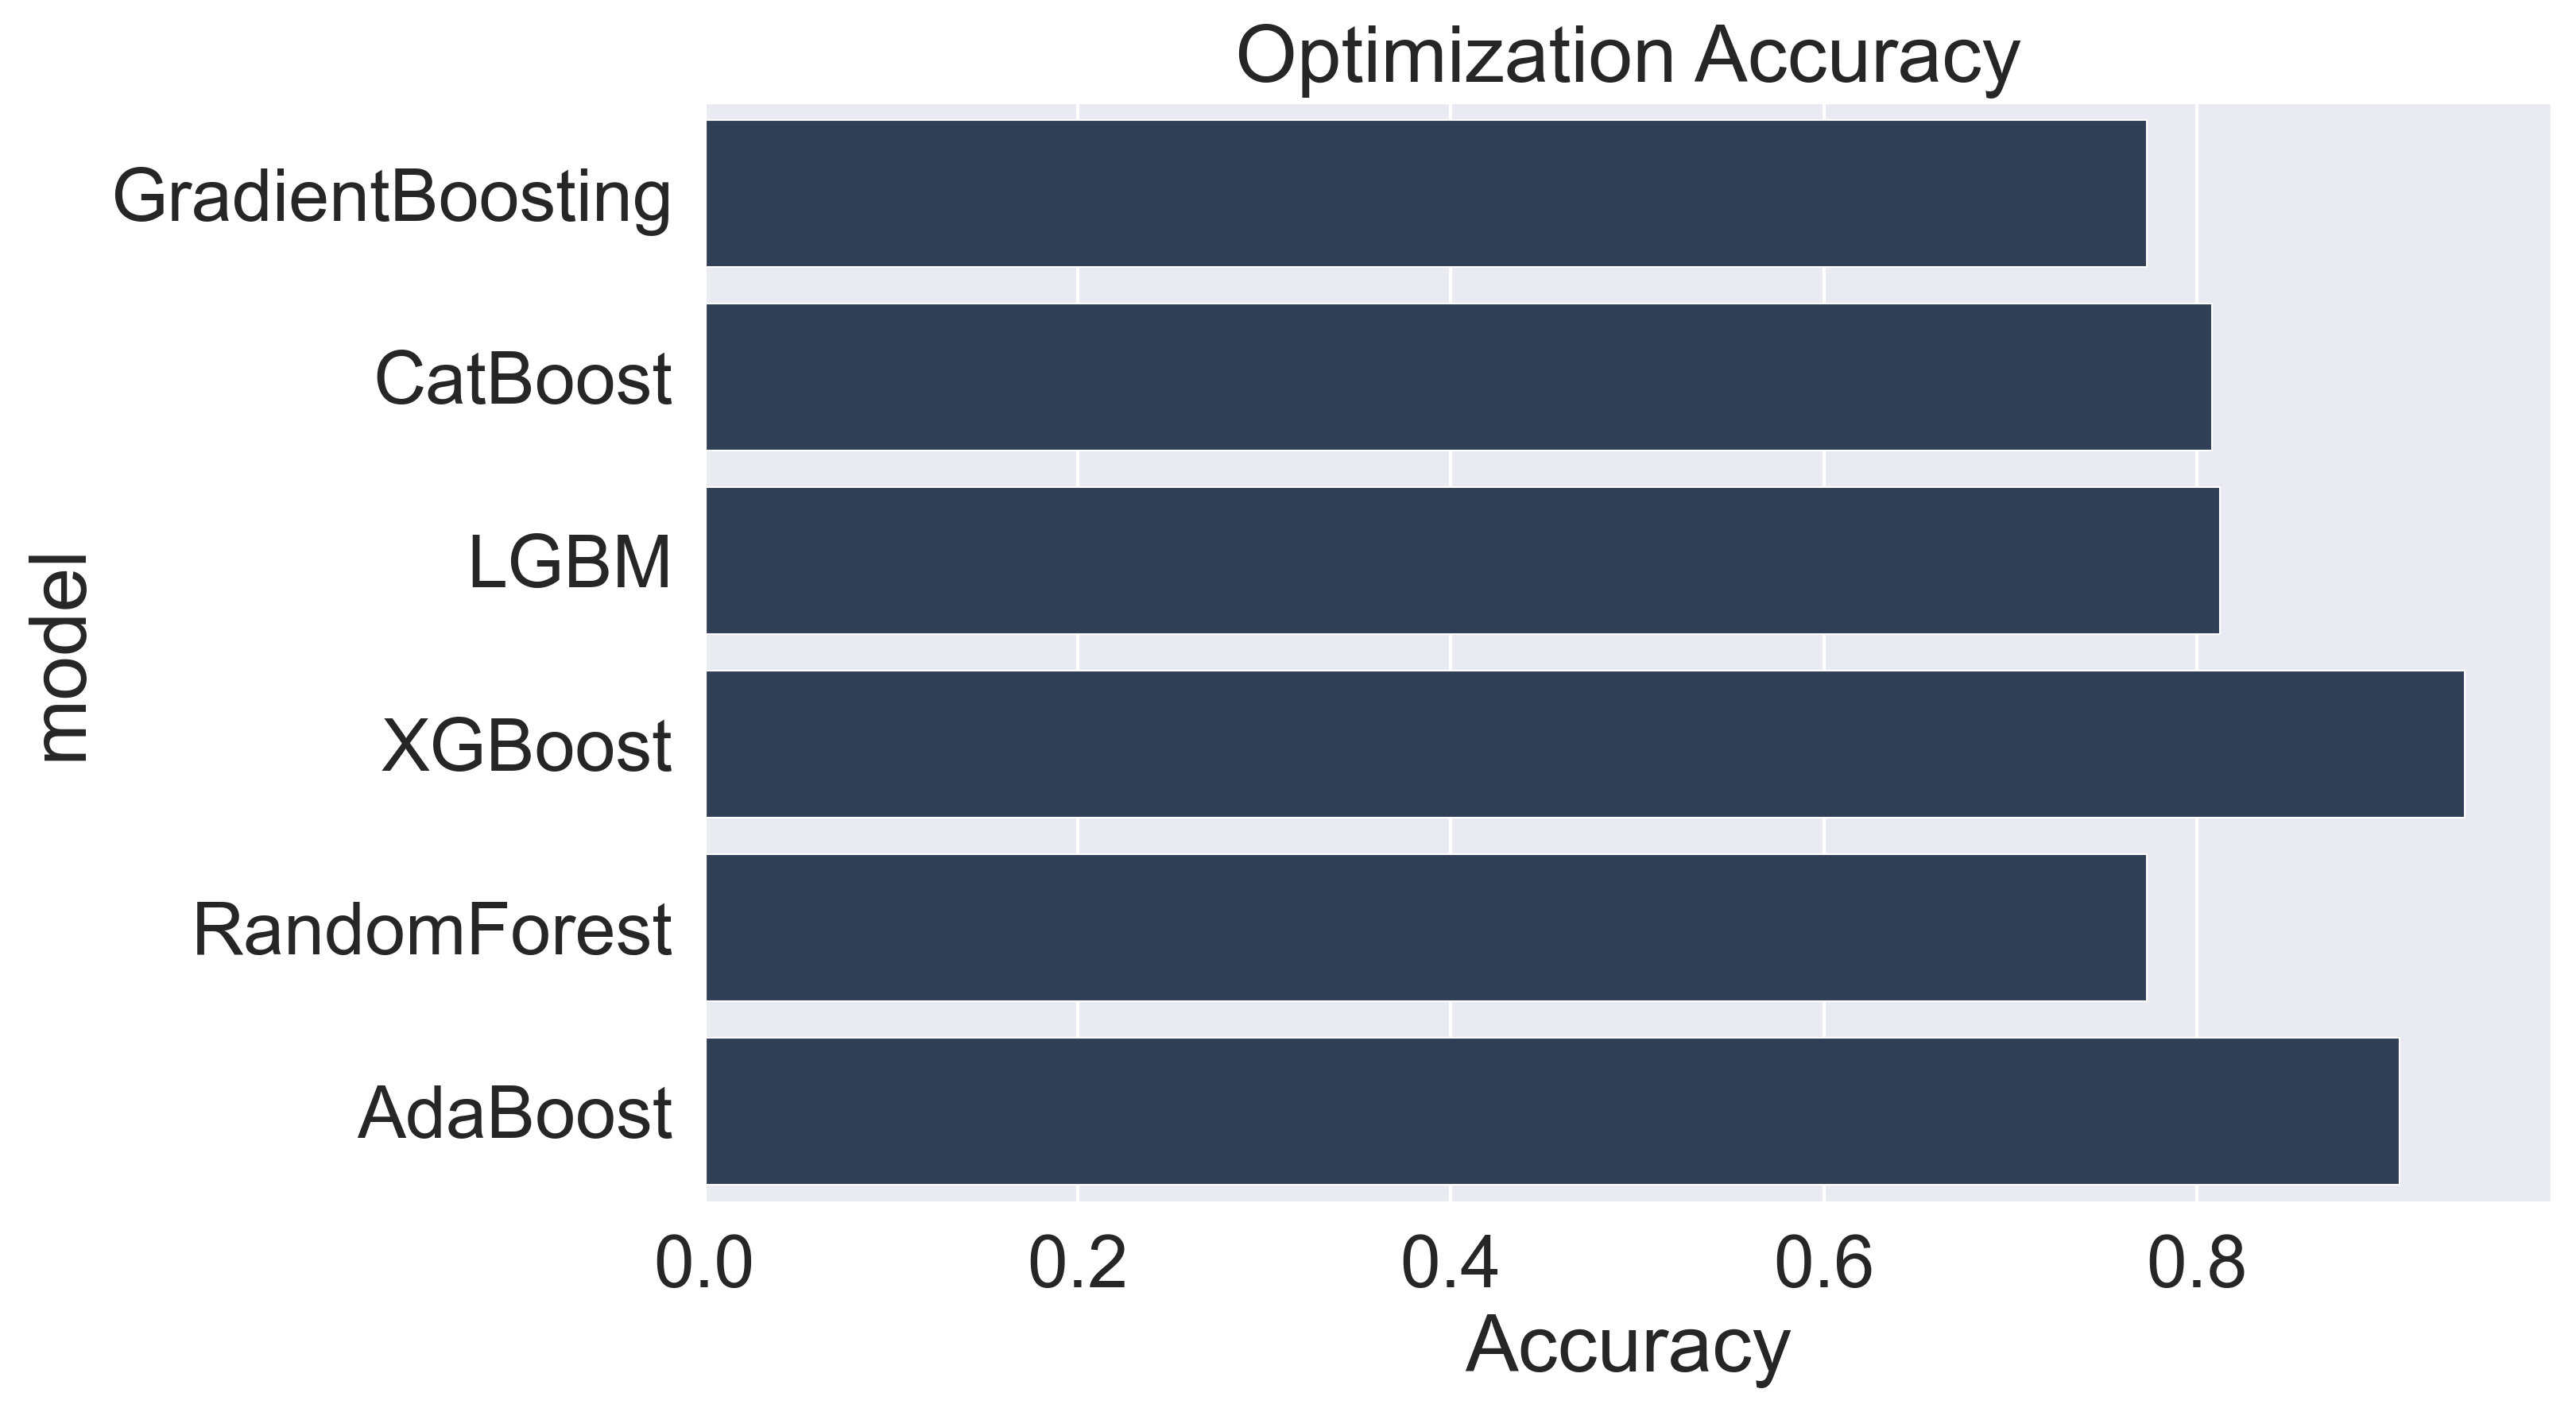

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 6),dpi = 300)

# 가로막대그래프 그리기
sns.barplot(x='accuracy', y='model', data=df_optimization, color='#293C5D',linewidth=0.5)
sns.set(font_scale=2)
# x축 레이블 설정
plt.xlabel('Accuracy')

# 그래프 타이틀 설정
plt.title('Optimization Accuracy')

# 그래프 보여주기
plt.show()

In [104]:
result_df

,0,1,2,3,4,mean
GradientBoosting,0.760870,0.826087,0.847826,0.847826,0.800000,0.816522
CatBoost,0.782609,0.869565,0.869565,0.782609,0.755556,0.811981
XGBoost,0.804348,0.760870,0.847826,0.826087,0.777778,0.803382
LGBM,0.695652,0.891304,0.760870,0.804348,0.733333,0.777101
AdaBoost,0.739130,0.782609,0.739130,0.847826,0.688889,0.759517
RandomForest,0.652174,0.782609,0.782609,0.717391,0.711111,0.729179


In [113]:
result_df = result_df.drop(columns=[0, 1, 2, 3, 4])

,index,mean
0,GradientBoosting,0.816522
1,CatBoost,0.811981
2,XGBoost,0.803382
3,LGBM,0.777101
4,AdaBoost,0.759517
5,RandomForest,0.729179


In [115]:
result_df = result_df.reset_index()
result_df = result_df.rename(columns={'index': 'model'})

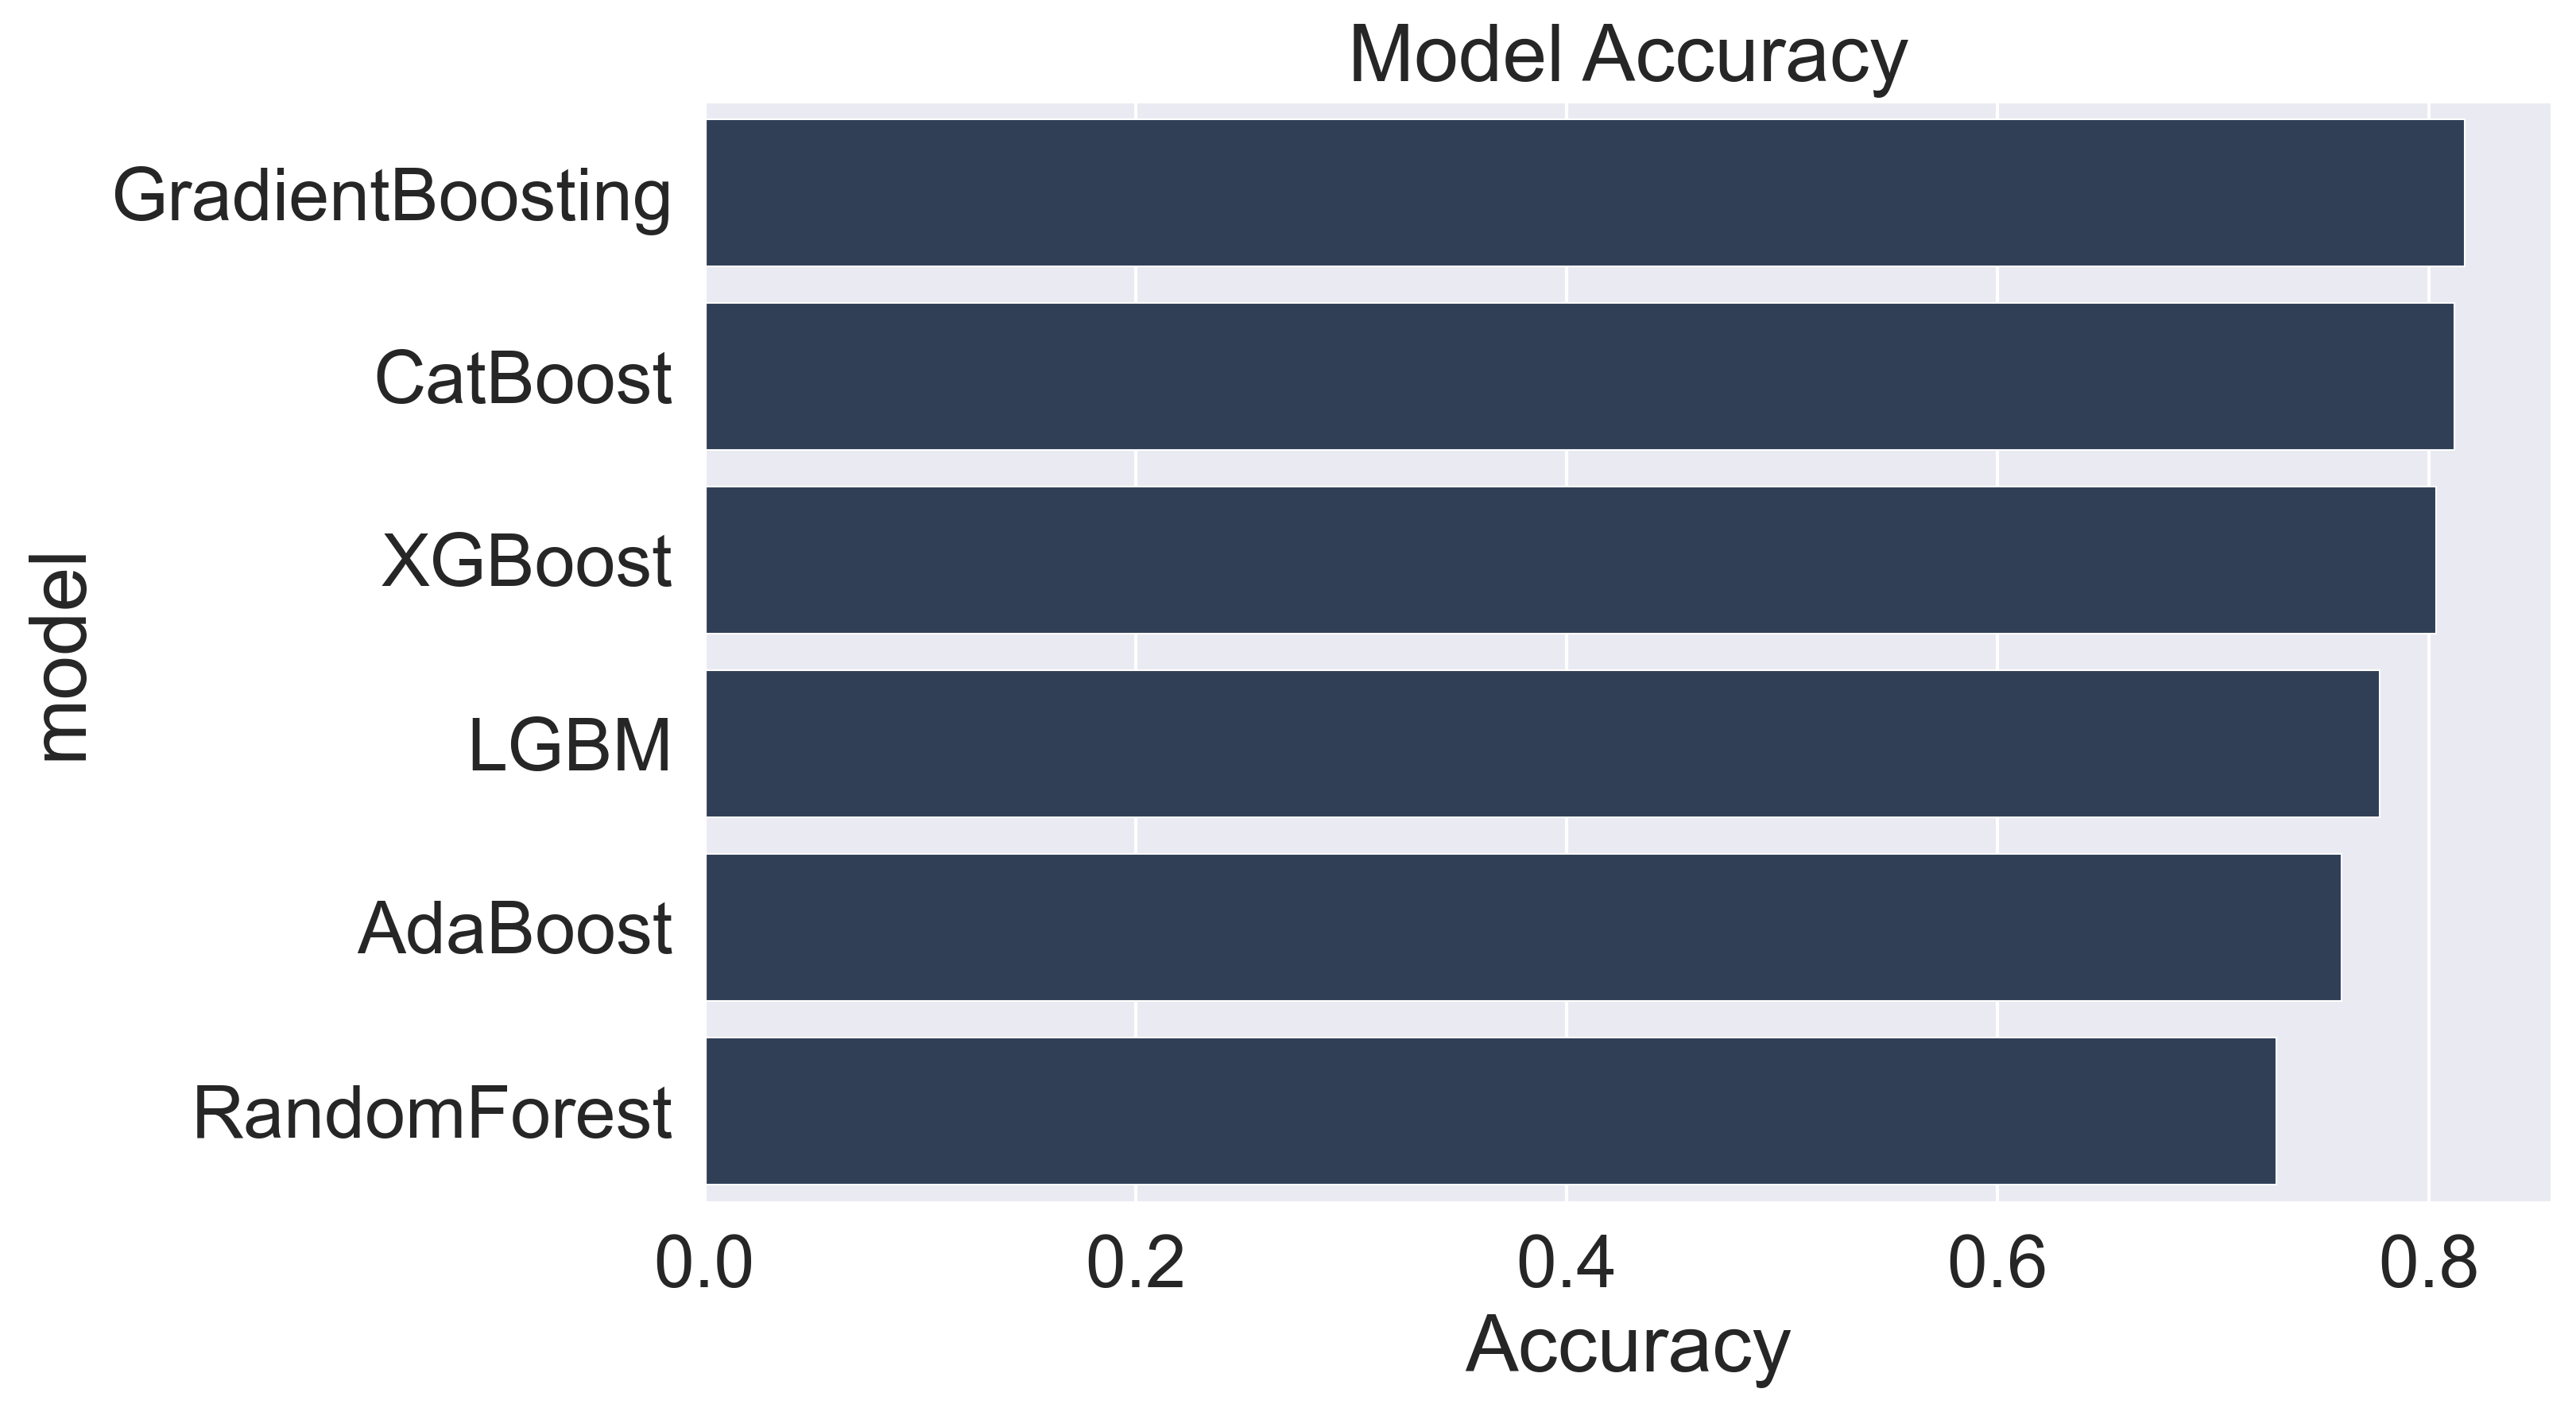

In [116]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6),dpi = 300)

# 가로막대그래프 그리기
sns.barplot(x='mean', y='model', data=result_df, color='#293C5D',linewidth=0.5)
sns.set(font_scale=2)
# x축 레이블 설정
plt.xlabel('Accuracy')

# 그래프 타이틀 설정
plt.title('Model Accuracy')

# 그래프 보여주기
plt.show()

In [108]:
# with open('df_optimization.pickle', 'wb') as f:
#     pickle.dump(df_optimization, f)

In [109]:
# with open('result_df.pickle', 'wb') as f:
#     pickle.dump(result_df, f)

## XGB로 feature importance 확인

In [117]:
features = d_input
feature = features.columns

In [118]:
df_fi = pd.DataFrame(columns = ['feature', 'importance'])

In [119]:
df_fi['feature'] = feature
df_fi['importance'] = xgb_fi

In [120]:
df_fi_30 = df_fi.sort_values(by = 'importance', ascending=False)
df_fi_30 = df_fi_30[:30]
len(df_fi_30)

30

In [121]:
plt.rcParams['font.family'] = 'NanumGothic'

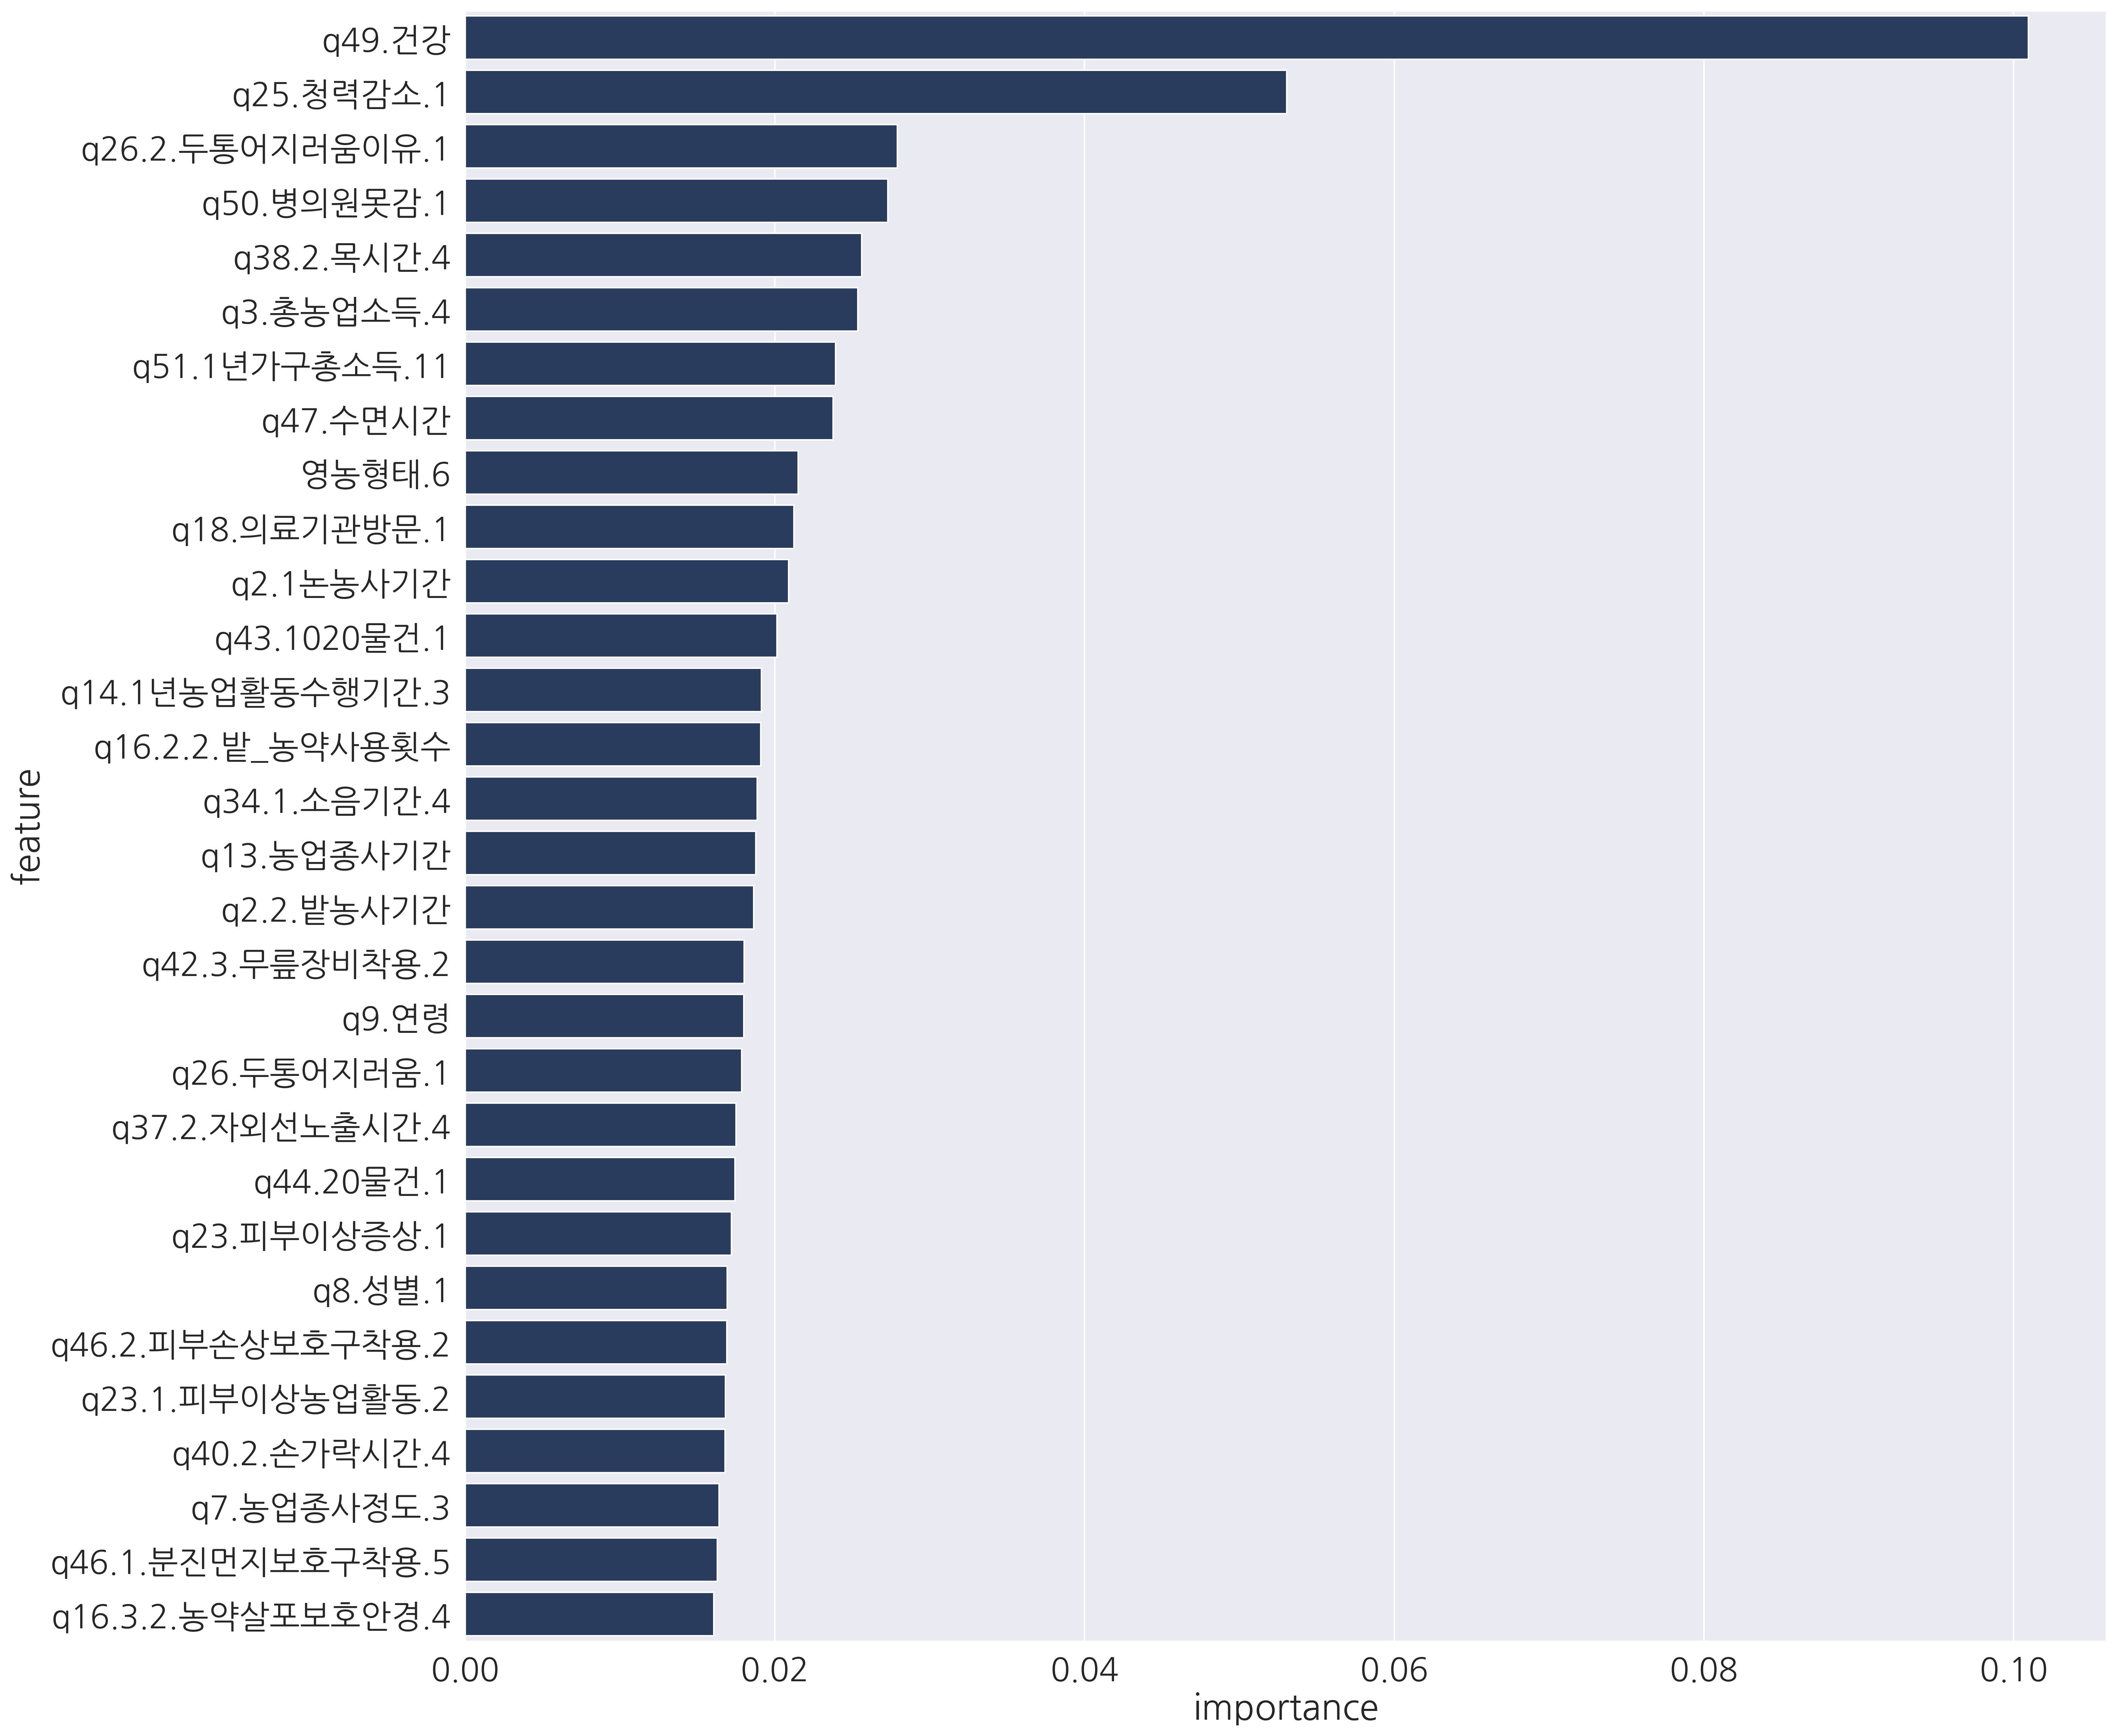

In [122]:
plt.figure(figsize=(20, 20), dpi = 300)

ax = sns.barplot(x='importance',
                 y='feature',
                 data=df_fi_30,
                 orient='h',
                 color='#203966')

sns.set(font_scale=3)

In [125]:
# xgb = XGBClassifier(n_estimators=100, random_state=0)
# xgb.fit(x_train,y_train)

features = d_input
x, y = (list(x) for x in zip(*sorted(zip(xgb_fi, features), reverse = False)))

trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='XGBoost Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2100,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [126]:
importance_descending = sorted(zip(xgb_fi, features),reverse = True)
importance_descending[:20]

[(0.10094351, 'q49.건강'),
 (0.053066228, 'q25.청력감소.1'),
 (0.027917188, 'q26.2.두통어지러움이유.1'),
 (0.027299613, 'q50.병의원못감.1'),
 (0.025619617, 'q38.2.목시간.4'),
 (0.025365219, 'q3.총농업소득.4'),
 (0.02392216, 'q51.1년가구총소득.11'),
 (0.023757737, 'q47.수면시간'),
 (0.021514118, '영농형태.6'),
 (0.021232868, 'q18.의료기관방문.1'),
 (0.020897128, 'q2.1논농사기간'),
 (0.02013694, 'q43.1020물건.1'),
 (0.019130304, 'q14.1년농업활동수행기간.3'),
 (0.019096162, 'q16.2.2.밭_농약사용횟수'),
 (0.018876508, 'q34.1.소음기간.4'),
 (0.018780272, 'q13.농업종사기간'),
 (0.018649876, 'q2.2.밭농사기간'),
 (0.018024955, 'q42.3.무릎장비착용.2'),
 (0.018012319, 'q9.연령'),
 (0.017861666, 'q26.두통어지러움.1')]

## AUC-ROC Curve

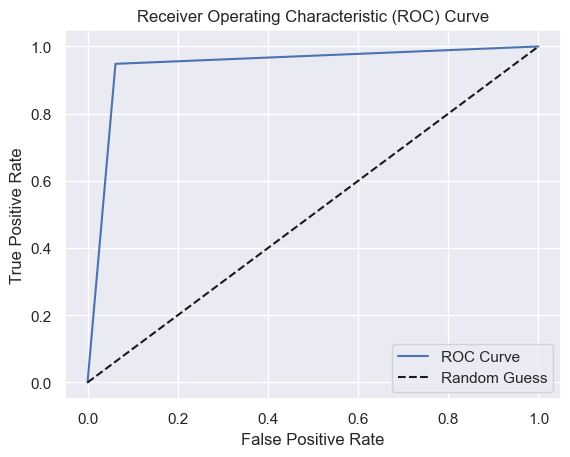

AUC-ROC score: 0.9432


In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 모델이 예측한 확률값과 실제 클래스 레이블을 입력으로 받습니다.
# (y_pred는 0과 1 사이의 확률값, y_true는 0 또는 1)
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_pred)

# ROC curve 그리기
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
sns.set(font_scale=2)

# AUC-ROC 점수 계산
auc_roc = roc_auc_score(y_test, xgb_y_pred)
print(f"AUC-ROC score: {auc_roc:.4f}")

## Confusion Matrix

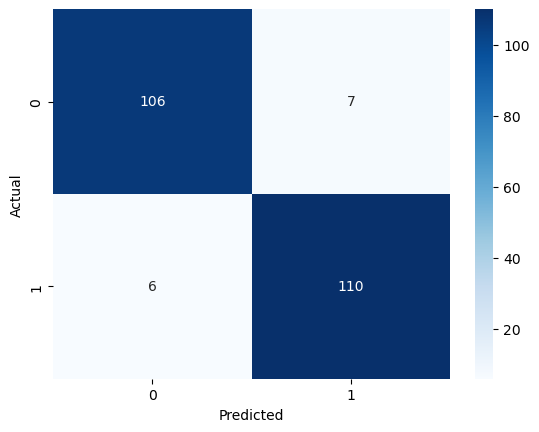

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 예측값과 실제값이 들어있는 배열을 생성합니다. 
predicted = xgb_y_pred
actual = y_test

# confusion matrix를 계산합니다. 
cm = confusion_matrix(actual, predicted)

# seaborn 라이브러리를 사용하여 heatmap으로 confusion matrix를 그립니다. 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 평균, 표준편차

In [65]:
train_1=pd.concat([x_train,y_train],axis=1)
test_1=pd.concat([x_test,y_test],axis=1)
all_1=pd.concat([train_1,test_1])
all_1

,q2.1.논농사수행여부.1,q2.1.논농사수행여부.2,q2.2.밭농사수행여부.1,q2.2.밭농사수행여부.2,q2.3.과수원수행여부.1,q2.3.과수원수행여부.2,q2.3.과수원기간.1,q2.3.과수원기간.2,q2.3.과수원기간.3,q2.3.과수원기간.4,...,q13.농업종사기간,q16.2.1.논_농약사용횟수,q16.2.2.밭_농약사용횟수,q16.2.3.과수_농약사용횟수,q32.일못한일수기타1,q33.3.치료비용1,q33.4.치료보험금액1,q47.수면시간,q49.건강,target
3260,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,20.0,4.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0
1640,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,45.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,3.0,1
508,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,50.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,5.0,1
9300,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,59.0,0.0,0.0,0.0,0.0,1000000.0,0.0,7.0,5.0,1
6186,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,0.0,10.0,0.0,0.0,0.0,0.0,8.0,3.0,0
5796,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,1
3368,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,47.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1
8556,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,0.0,30.0,0.0,0.0,0.0,0.0,8.0,4.0,1


In [66]:
target0=all_1[all_1['target']==0]
target1=all_1[all_1['target']==1]

In [67]:
target0.index

Int64Index([ 3260,  6186,  8709,  6836,  3871,  2565,  3852,   718, 10112,
             7165,
            ...
             5124,  6771,  2092,  7388,  1880,  6463,  8321,  2632, 10282,
             6971],
           dtype='int64', length=457)

In [68]:
target0=df.loc[target0.index]
target1=df.loc[target1.index]
target0['q47.수면시간'].mean()


6.700218818380744

In [69]:
target1['q47.수면시간'].mean()

5.435448577680525

In [70]:
target0['q2.1논농사기간'].mean()

20.667396061269148

In [72]:
target1['q2.1논농사기간'].mean()

24.533916849015316

In [ ]:
target0['q47.수면시간'].mean()

In [ ]:
target1['q47.수면시간'].mean()

In [98]:
target0['q3.총농업소득.4']

3260     0.0
6186     0.0
8709     1.0
6836     0.0
3871     1.0
        ... 
6463     1.0
8321     0.0
2632     1.0
10282    1.0
6971     0.0
Name: q3.총농업소득.4, Length: 457, dtype: float64